## Исследовательский анализ данных сервиса Яндекс Афиша и проверка гипотез

- Автор: Забродская Е.А.
- Дата: 18.08.2025

## Цели и задачи проекта

### Цель проекта
Провести исследовательский анализ данных сервиса Яндекс Афиша за период с 01.06.2024 по 31.10.2024, чтобы выяснить причины
изменения пользовательских предпочтений, а также проверить гипотезы об активности пользователей мобильных и стационарных устройств.   

### Задачи проекта

- Подготовить данные   
Загрузить данные и познакомится с ними, исследовать данные на пропуски и дубликаты, преобразовать типы данных, создать необходимые столбцы.
- Провести исследовательский анализ данных.  
Проанализировать динамику количества заказов во времени и влияние сезонности (лето, осень) в разных разрезах: по типам мероприятия, типам устройств, категориям мероприятий (по возрастному рейтингу). Исследовать влияние сезонности на изменение средней выручки с билета для разных типов мероприятий.  
Проанализировать дневную динамику общего числа заказов, количества активных пользователей DAU, среднего числа заказов на одного пользователя, средней стоимости одного билета осенью. Изучить зависимость пользовательской актиности осенью.  
Исследовать разнообразие мероприятий и количество заказов в разных регионах. Исследовать разнообразие мероприятий, количество заказов и суммарную выручку для разных партнеров.  
- Используя данные за осенний период проверить гипотезы об активности пользователей мобильных и стационарных устройств.
Сформулировать нулевую и альтернативную гипотезы.  
Подготовить данные для проверки гипотез. Проверить данные на выбросы и тяжелые хвосты. Исследовать соотношение размеров групп, независимость выборок, сравнить статистики групп. 
Выбрать подходящие статистические тесты и провести их.  
- Написать общий вывод.

## Описание данных

Данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 31 октября 2024 года.

Датасеты:

`final_tickets_orders_df.csv` - информация о всех заказах билетов, совершенных с помощью мобильных и стационарных устройств.  
Содержит следующие поля:  


`final_tickets_events_df.csv` - информация о событиях, включая город и регион события, а также информация о площадке проведения мероприятия.  
Содержит следующие поля:  
  

`final_tickets_tenge_df.csv` - информация о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге.  
содержит следующие поля:  


## Содержимое проекта

### 1. Загрузка данных и знакомство с ними   
1.1 Загрузка данных  
2.1 Знакомство с данными
### 2. Предобработка данных
2.1 Создание объединенного датасета  
2.2 Проверка на пропуски  
2.3 Изучение данных в ключевый столбцах  
2.4 Проверка на дубликаты  
2.5 Преобразование типов данных  
2.6 Создание новых столбцов  
### 3. Исследовательский анализ данных
3.1 Анализ распределения заказов по сегментам и их сезонные изменения  
3.2 Осенняя активность пользователей  
3.3 Популярные события и партнёры  
### 4. Статистический анализ данных
4.1 Проверка гипотезы о среднем количестве заказов на одного пользователя для разных типов устройств  
4.2 Проверка гипотезы о среднем времени между заказами для пользователей разных типов устройств
### 5. Общий вывод и рекомендации

## 1. Загрузка данных и знакомство с ними

### 1.1 Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
PATH1 = ...
PATH2 = ...

In [3]:
try:
    final_tickets_orders_df = pd.read_csv(PATH1 + 'final_tickets_orders_df.csv')
except FileNotFoundError:
    final_tickets_orders_df = pd.read_csv(PATH2 + 'final_tickets_orders_df.csv')

In [4]:
try:
    final_tickets_events_df = pd.read_csv(PATH1 + 'final_tickets_events_df.csv')
except FileNotFoundError:
    final_tickets_events_df = pd.read_csv(PATH2 + 'final_tickets_events_df.csv')

In [5]:
try:
    final_tickets_tenge_df = pd.read_csv(PATH1 + 'final_tickets_tenge_df.csv')
except FileNotFoundError:
    final_tickets_tenge_df = pd.read_csv(PATH2 + 'final_tickets_tenge_df.csv')

### 1.2 Знакомство с данными

In [6]:
final_tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Датасет `final_tickets_orders_df` состоит из 290849 строк и 14 столбцов.  
Пропуски есть только в столбце `days_sinse_prev`. Пропуски в этом столбце должны быть (для первого заказа каждого пользователя).  
4 столбца с типом данных `int64`: для столбцов `order_id`, `event_id`, `age_limit`, `tickets_count` тип данных соответствует содержимому столбцов. Можно снизить размерность данных.  
7 столбцов с типом данных `object`: для столбцов `user_id`, `cinema_circuit`, `currency_code`, `device_type_canonical`, `service_name` тип данных соответствует содержимому столбцов. Для столбцов `created_dt_msk`, `created_ts_msk` тип данных необходимо изменить на `datetime64`.  
3 столбца с типом данных `float64`: для столбцов `revenue`, `total`, `days_since_prev` тип данных соответствует содержимому столбцов. Можно снизить размерность данных.

In [7]:
final_tickets_orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


Содержание столбцов соответствует описанию.

In [8]:
final_tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Датасет `final_tickets_events_df` содержит 22427 строк и 11 столбцов.  
Пропусков нет.  
3 столбца с типом данных `int 64`: для столбцов `event_id`, `city_id`, `venue_id` тип данных соответстует содержимому столбцов. Можно снизить размерность данных.  
8 столбцов с типом данных `object`: для столбцов `event_name`, `event_type_descriprion`, `event_type_main`, `organizers`, `region_name`, `city_name`,`venue_name`, `venue_address` тип данных соответствует содержимому столбцов.

In [9]:
final_tickets_events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


Содержание столбцов соответствует описанию.

In [10]:
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Датасет `final_tickets_tenge_df` содержит 357 строк, 4 столбца.  
2 столбца с типом данных `object`: для столбца `cdx` тип данных соответствует содержимому. Для столбца `data` необходимо поменять тип данных на `datetime64`.  
1 столбец с типом данных `int64`: для столбца `nominal` тип данных соответствует содержимому. Можно снизить размерность данных.    1 столбец с типом данных `float64`: для столбца `curs` тип данных соответствует содержимому. Можно снизить размерность данных.

In [11]:
final_tickets_tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


Содержание столбцов соответствует описанию.

Содержание столбцов датасетов `final_tickets_orders_df`, `final_tickets_events_df`, `final_tickets_tenge_df` соответствует описанию.  
Необходимо изменить тип данных столбцов `created_dt_msk`, `created_ts_msk` датасета `final_tickets_orders_df` на `datetime64`.

## 2. Предобработка данных

### 2.1 Создание объединенного датасета

Создадим объединенный датасет.

In [12]:
final_tickets_df = pd.merge(final_tickets_orders_df, final_tickets_events_df, on = 'event_id')
final_tickets_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"


In [13]:
final_tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

В объединенном датасете 290611 строк и 24 столбца. В датасете `final_tickets_orders_df` 290849 строк. Строк стало меньше, так как не все значения поля `event_id` датасета `final_tickets_orders_df` имеют совпадения со значениями поля `event_id` датасета `final_tickets_events_df`.

### 2.2 Проверка на пропуски 

Посчитаем количество пропусков в объединенном датасете.

In [14]:
final_tickets_df.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
dtype: int64

Пропуски содержатся только в столбце `days_since_prev`.

### 2.3 Изучение данных в ключевый столбцах

Изучим данные в категориальных столбцах.

In [15]:
sorted(list(final_tickets_df.age_limit.unique()))

[0, 6, 12, 16, 18]

In [16]:
sorted(list(final_tickets_df.currency_code.unique()))

['kzt', 'rub']

In [17]:
sorted(list(final_tickets_df.device_type_canonical.unique()))

['desktop', 'mobile']

In [18]:
sorted(list(final_tickets_df.event_type_description.unique()))

['балет',
 'выставка',
 'концерт',
 'кукольный спектакль',
 'музыкальный спектакль',
 'мюзикл',
 'опера',
 'оперетта',
 'подарок',
 'рок-мюзикл',
 'снегурочка',
 'событие',
 'спектакль',
 'спорт',
 'спортивное мероприятие',
 'фестиваль',
 'цирковое шоу',
 'шоу',
 'экскурсия',
 'ёлка']

In [19]:
sorted(list(final_tickets_df.event_type_main.unique()))

['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']

В столбце `event_type_description` есть значение "событие". Посмотрим какие значения столбца 'event_type_main' соответствуют ему.

In [20]:
final_tickets_df[final_tickets_df.event_type_description == 'событие'].event_type_main.unique()

array(['выставки', 'другое', 'стендап'], dtype=object)

Создадим новый столбец, в котором заменим значение "событие" на соответствующее ему значение из столбца 'event_type_main'.

In [21]:
def change_descr(row):
    if row['event_type_description'] == 'событие':
        if row['event_type_main'] == 'выставки':
            return 'выставка'
        else:
            return row['event_type_main']
    else: 
        return row['event_type_description']
final_tickets_df['event_type_description_new'] = final_tickets_df.apply(change_descr, axis=1)

In [22]:
final_tickets_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,event_type_description_new
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль


Столбец `event_type_description_new` создан.

Посмотрим, какие значения столбца `event_type_description` соответствуют значение "другое" столбца `event_type_main`.

Создадим новый столбец `event_type_main_new`, в котором заменим значения `другое` на:  
`спектакль` для строк, у которых в столбце `event_type_description` стоят `кукольный спектакль`, `музыкальный спекталь`, `оперетта` или `рок-мюзикл`;
`выставки` для строк, у которых в столбце `event_type_description` стоит `выставка`.

In [23]:
def change_main(row):
    if row['event_type_main'] == 'другое':
        if row['event_type_description_new'] == 'выставка':
            return 'выставки'
        elif row['event_type_description_new'] == 'кукольный спектакль' or row['event_type_description_new'] == 'музыкальный спектакль' or row['event_type_description_new'] == 'оперетта' or row['event_type_description_new'] == 'рок-мюзикл': 
            return 'театр'
        else:
            return row['event_type_main']
    else:
        return row['event_type_main']

final_tickets_df['event_type_main_new'] = final_tickets_df.apply(change_main, axis=1)

In [24]:
final_tickets_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,event_type_description_new,event_type_main_new
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр


Столбец `event_type_main_new` создан.

In [25]:
sorted(list(final_tickets_df.service_name.unique()))

['Crazy ticket!',
 'Show_ticket',
 'Билет по телефону',
 'Билеты без проблем',
 'Билеты в интернете',
 'Билеты в руки',
 'Быстробилет',
 'Быстрый кассир',
 'Весь в билетах',
 'Восьмёрка',
 'Вперёд!',
 'Выступления.ру',
 'Городской дом культуры',
 'Дом культуры',
 'Дырокол',
 'За билетом!',
 'Зе Бест!',
 'КарандашРУ',
 'Кино билет',
 'Край билетов',
 'Лимоны',
 'Лови билет!',
 'Лучшие билеты',
 'Мир касс',
 'Мой билет',
 'Облачко',
 'Прачечная',
 'Радио ticket',
 'Реестр',
 'Росбилет',
 'Тебе билет!',
 'Телебилет',
 'Тех билет',
 'Цвет и билет',
 'Шоу начинается!',
 'Яблоко']

In [26]:
sorted(list(final_tickets_df.region_name.unique()))

['Белоярская область',
 'Берестовский округ',
 'Берёзовская область',
 'Боровлянский край',
 'Верховинская область',
 'Верхозёрский край',
 'Верхоречная область',
 'Ветренский регион',
 'Вишнёвский край',
 'Глиногорская область',
 'Голубевский округ',
 'Горицветская область',
 'Горноземский регион',
 'Горностепной регион',
 'Дальнеземская область',
 'Дальнезорский край',
 'Дубравная область',
 'Залесский край',
 'Заречная область',
 'Зеленоградский округ',
 'Златопольский округ',
 'Золотоключевской край',
 'Зоринский регион',
 'Каменевский регион',
 'Каменичская область',
 'Каменноозёрный край',
 'Каменноярский край',
 'Каменополянский округ',
 'Ключеводский округ',
 'Кристаловская область',
 'Кристальная область',
 'Крутоводская область',
 'Крутоводский регион',
 'Лесноярский край',
 'Лесодальний край',
 'Лесополянская область',
 'Лесостепной край',
 'Лесоярская область',
 'Луговая область',
 'Лугоградская область',
 'Малиновая область',
 'Малиновоярский округ',
 'Медовская область',


In [27]:
sorted(list(final_tickets_df.city_name.unique()))

['Айкольск',
 'Айсуак',
 'Акбастау',
 'Акбасты',
 'Акжолтау',
 'Алтынкала',
 'Алтынсай',
 'Байкуль',
 'Байсары',
 'Байтерековск',
 'Беловодск',
 'Белоярск',
 'Бережанка',
 'Бережанск',
 'Березиногорск',
 'Березиноск',
 'Березовцево',
 'Берестовец',
 'Берестяград',
 'Берёзиново',
 'Берёзовка',
 'Берёзогорск',
 'Берёзодальн',
 'Берёзополье',
 'Берёзореч',
 'Берёзоречье',
 'Бозарык',
 'Боровлянск',
 'Буркиттау',
 'Бурьяново',
 'Верховино',
 'Верховка',
 'Верхозолотск',
 'Верхозорье',
 'Верхоозёров',
 'Ветеринск',
 'Вишнёво',
 'Вишнёвогорск',
 'Вишнёводск',
 'Водниково',
 'Глиногорск',
 'Глиногорь',
 'Глиноград',
 'Глинозолото',
 'Глинозорь',
 'Глинолес',
 'Глинополин',
 'Глинополье',
 'Глинополянск',
 'Глинореч',
 'Глинянск',
 'Голубевск',
 'Голубино',
 'Гореловск',
 'Горицветск',
 'Горноград',
 'Горнодолинск',
 'Горнолесье',
 'Горнолуг',
 'Горнополец',
 'Горнополье',
 'Горнополянск',
 'Горнополяровск',
 'Горнополёк',
 'Горноставинск',
 'Горяново',
 'Дальнеград',
 'Дальнесветин',
 'Дальне

Изучим данные в цифровых столбцах.

In [28]:
final_tickets_df.tickets_count.describe()

count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

Максимальное значение в столбце `tickets_count` намного больше значения 75-го процентиля. Построим гистограмму распределения.

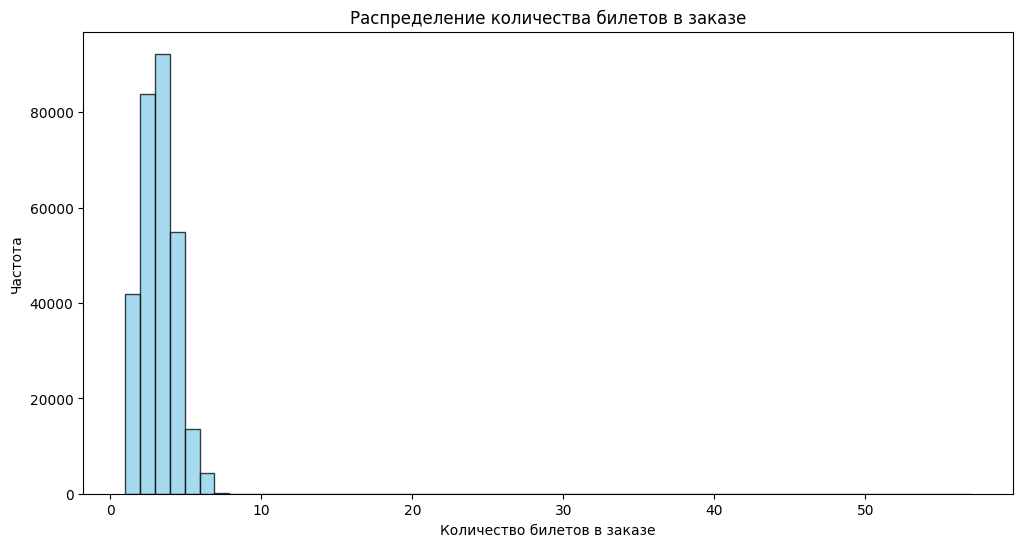

In [29]:
plt.figure(figsize=(12,6))

final_tickets_df['tickets_count'].plot(kind='hist',
                                       bins=57,
                                       color='skyblue',
                                       edgecolor='black',
                                       alpha=0.75,
                                       rot=0)

plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов в заказе')
plt.ylabel('Частота')
plt.show()

Рассчитаем 99-й процентиль.

In [30]:
final_tickets_df['tickets_count'].quantile(0.99)

6.0

По гистограмме распределения видно, что значения количества билетов в заказе встречаются очень редко. Более 99% значений количества билетов в заказе меньше или равно 6. Отфильтруем датасет по значению 99-го процентиля.

In [31]:
final_tickets_df_fil_tic = final_tickets_df[final_tickets_df.tickets_count <= final_tickets_df['tickets_count'].quantile(0.99)]

In [32]:
final_tickets_df_fil_tic['tickets_count'].describe()

count    290423.000000
mean          2.749366
std           1.143899
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           6.000000
Name: tickets_count, dtype: float64

Исследуем столбец `revenue` в рублях.

In [33]:
final_tickets_df_fil_tic_rub = final_tickets_df_fil_tic[final_tickets_df_fil_tic.currency_code == 'rub']
final_tickets_df_fil_tic_rub['revenue'].describe()

count    285354.000000
mean        547.701634
std         871.639105
min         -90.760000
25%         114.047500
50%         346.450000
75%         791.380000
max       81174.540000
Name: revenue, dtype: float64

Минимальное значение выручки отрицательно (-90,76 руб.). Медиана (346,45 руб.) меньше, чем среднее значение (547,7 руб.). Максимальное значение (81174,54 руб.) значительно больше, чем 75-й процентиль (791,38 руб.). Стандартное отклонение большое (871,64 руб.). Проверим данные на выбросы с помощью диаграммы размаха.

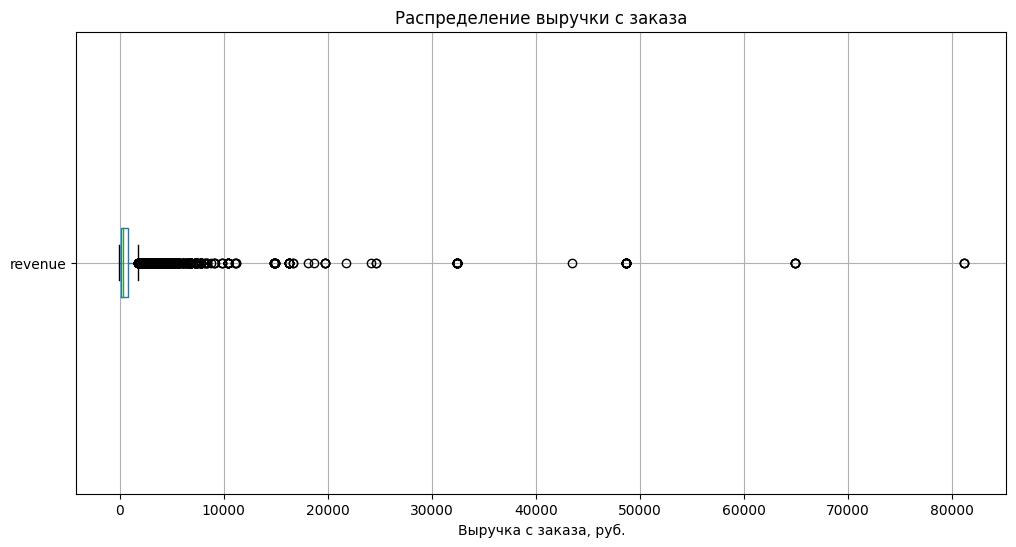

In [34]:
plt.figure(figsize=(12,6))

final_tickets_df_fil_tic_rub.boxplot(column='revenue',
                                 vert=False)

plt.title('Распределение выручки с заказа')
plt.xlabel('Выручка с заказа, руб.')

plt.show()

Большинство значений выручки лежит в области меньшей, чем 10000 руб. Отфильтруем в датасете строки со значением выручки в рублях больше, чем 99-1 процентиль.

In [35]:
final_tickets_df_rub = final_tickets_df_fil_tic_rub[(final_tickets_df_fil_tic_rub.revenue <= final_tickets_df_fil_tic_rub.revenue.quantile(0.99)) & (final_tickets_df_fil_tic_rub.revenue  > 0)]

In [36]:
final_tickets_df_rub.revenue.describe()

count    276609.000000
mean        521.013991
std         499.668878
min           0.020000
25%         123.270000
50%         355.060000
75%         788.900000
max        2569.590000
Name: revenue, dtype: float64

Строки с выбросами отфильтрованы.

In [37]:
final_tickets_df_fil_tic_kzt = final_tickets_df_fil_tic[final_tickets_df_fil_tic.currency_code == 'kzt']
final_tickets_df_fil_tic_kzt.revenue.describe()

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

Минимальное значение выручки в тенге равно 0. Максимальное значение 26425,86 значительно больше 75-го процентиля (73997,66 тенге). Проверим данные на выбросы с помощью диаграммы размаха.

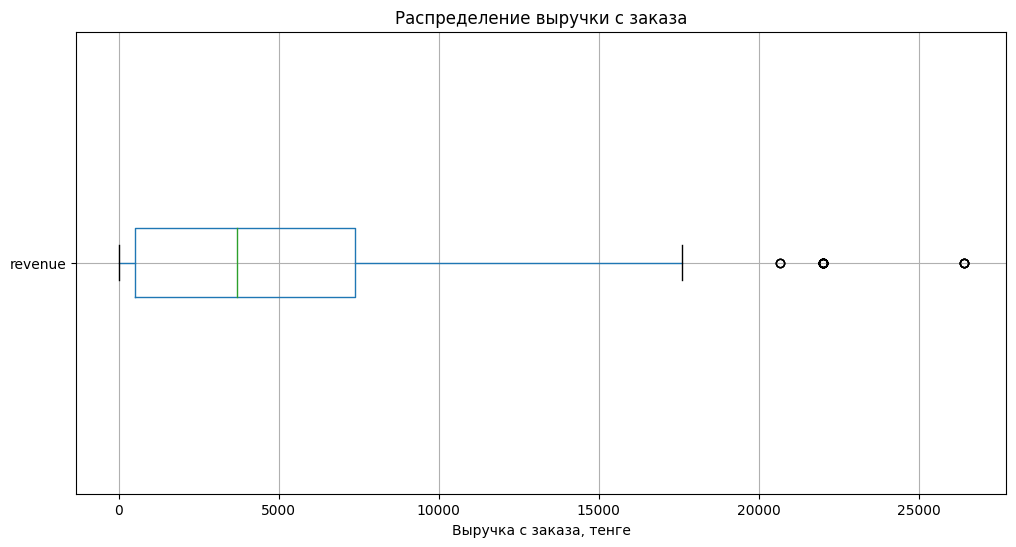

In [38]:
plt.figure(figsize=(12,6))

final_tickets_df_fil_tic_kzt.boxplot(column='revenue',
                                 vert=False)

plt.title('Распределение выручки с заказа')
plt.xlabel('Выручка с заказа, тенге')

plt.show()

Большая часть значений лежит в области значений, меньших 17500 тенге. Отфильтруем датасет по значению 99-го процентиля.

In [39]:
final_tickets_df_kzt = final_tickets_df_fil_tic_kzt[(final_tickets_df_fil_tic_kzt.revenue <= final_tickets_df_fil_tic_kzt.revenue.quantile(0.99)) & (final_tickets_df_fil_tic_kzt.revenue  > 0)]
final_tickets_df_kzt.revenue.describe()

count     5034.000000
mean      4899.501804
std       4742.493721
min          8.670000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      17617.240000
Name: revenue, dtype: float64

Соединим обратно два датасета: в рублях и в тенге.

In [40]:
df_fil = pd.concat([final_tickets_df_rub, final_tickets_df_kzt])
df_fil

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,event_type_description_new,event_type_main_new
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",спектакль,театр
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285855,8313199,bc3bf69af20b4bc,2024-10-24,2024-10-24 19:52:33,580115,нет,0,kzt,mobile,167.00,...,спорт,№4952,Шанырский регион,Широковка,162,1065,"Центр ремёсел ""Финал"" Лимитед","пер. Трудовой, д. 7",спортивное мероприятие,спорт
285856,8313228,bc3bf69af20b4bc,2024-10-24,2024-10-24 19:47:12,580115,нет,0,kzt,mobile,167.00,...,спорт,№4952,Шанырский регион,Широковка,162,1065,"Центр ремёсел ""Финал"" Лимитед","пер. Трудовой, д. 7",спортивное мероприятие,спорт
288142,8578317,c96b961916a84fb,2024-06-06,2024-06-06 22:25:39,349326,нет,16,kzt,desktop,2106.20,...,концерты,№4951,Верхоречная область,Серебрянка,163,1335,"Фестивальный проект ""Гастроном"" Лтд","ул. Космодемьянской, д. 3/7",концерт,концерты
289261,3093837,dfa6b4f4dd58d55,2024-10-31,2024-10-31 15:35:11,583623,нет,6,kzt,mobile,680.89,...,другое,№5088,Верхоречная область,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",другое,другое


### 2.4 Проверка на дубликаты

Проверим датасет `df_fil` на дубликаты.

In [41]:
df_fil.duplicated().sum()

0

Явных дубликатов в датасете нет (все значения поля `order_id` должны быть уникальны). Проверим датасет на неявные дубикаты.

In [42]:
df_fil.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id'], keep=False).sum()

207

Выведем строки с дубликатами по полям 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id'.

In [43]:
pd.set_option('display.max_columns', None)
df_fil[df_fil.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id'], keep=False) == True]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,event_type_description_new,event_type_main_new
3442,6885819,0e6fa925c5f346f,2024-09-09,2024-09-09 11:00:15,534657,нет,16,rub,mobile,339.61,Быстробилет,1,2612.35,0.0,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",концерт,концерты
3444,6885906,0e6fa925c5f346f,2024-09-09,2024-09-09 11:00:15,534657,нет,16,rub,mobile,1018.82,Быстробилет,3,7837.05,0.0,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",концерт,концерты
3838,7299649,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,Быстробилет,2,5224.70,0.0,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",концерт,концерты
3839,7299678,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,Быстробилет,2,5224.70,0.0,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",концерт,концерты
15024,8015601,86dd447fed39a50,2024-09-30,2024-09-30 12:42:22,521167,нет,12,rub,desktop,187.69,Лови билет!,3,2681.24,0.0,76f2781c-7a60-415a-8905-b7932f8512d0,событие,выставки,№5023,Каменевский регион,Глиногорск,213,3240,"Народный ансамбль ""Дизайн"" Инкорпорэйтед","пер. Речной, д. 5/9",выставка,выставки
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24745,161502,110125b4a429b43,2024-06-12,2024-06-12 10:23:35,536826,нет,12,kzt,mobile,17617.24,Мой билет,4,220215.55,0.0,76af4f88-c554-4e9e-9df4-1cc8aeec8959,концерт,концерты,№4950,Верхоречная область,Серебрянка,163,2066,"Архитектурное бюро ""Секрет"" Инк","пер. Проточный, д. 70 к. 881",концерт,концерты
42679,3320153,ae8e3d5af3036a6,2024-07-30,2024-07-30 11:20:46,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,13.0,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",фестиваль,концерты
42681,3320211,ae8e3d5af3036a6,2024-07-30,2024-07-30 11:20:46,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,0.0,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",фестиваль,концерты
172605,6446643,9bbe3534bbaa8e1,2024-07-03,2024-07-03 15:41:28,538828,нет,12,kzt,mobile,7103.29,Билеты без проблем,3,101475.53,5.0,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерт,концерты,№2434,Верхоречная область,Серебрянка,163,4348,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376",концерт,концерты


У части дублирующихся строк совпадают значения в столбце `revenue`. Посчитаем сколько таких строк.

In [44]:
df_fil.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'revenue'], keep=False).sum()

79

79 дубликатов по полям 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'revenue'. Посчитаем это процент от общего количества строк.

In [45]:
round(df_fil.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'revenue'], keep=False).sum() * 100 / df_fil.shape[0], 2)

0.03

Таких строк 0,03 %. Удалим все такие дубликаты, кроме первой строки.

In [46]:
df_fil1 = df_fil.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'revenue'])

Часть дублирующихся строк отличается по значениям в столбце `revenue`. Посчитаем количество таких строк.

In [47]:
df_fil1.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id'], keep=False).sum()

139

In [48]:
round(df_fil1.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id'], keep=False).sum() * 100/ df_fil1.shape[0], 2)

0.05

Таких строк всего 0,05% от общего количества. И так как неизвестно, какая сумма правильная, то удалим все такие строки.

In [49]:
df_fil2 = df_fil1.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id'], keep=False)

In [50]:
print(f'Всего удалено {df_fil.shape[0] - df_fil2.shape[0]} строк')
print(f'Это составляет {round((df_fil.shape[0] - df_fil2.shape[0]) * 100/ df_fil.shape[0], 2)}% от общего числа строк.')

Всего удалено 180 строк
Это составляет 0.06% от общего числа строк.


Всего удалили 180 строк, что составляет 0,06% от общего числа строк.

### 2.5 Преобразование типов данных

Преобразуем тип данных столбцов датасета `df_fil2`,содержащих значения даты и времени, к типу данных `datetime64`.

In [51]:
df_fil2 = df_fil2.copy()

In [52]:
df_fil2['created_dt_msk'] = pd.to_datetime(df_fil2['created_dt_msk'])
df_fil2['created_ts_msk'] = pd.to_datetime(df_fil2['created_ts_msk'])

Для столбцов `order_id`, `event_id`, `age_limit`, `tickets_count`, `city_id`, `venue_id`, `revenue`, `total`, `days_since_prev` датасета `df_fil2` можно снизить размерность данных.

In [53]:
df_fil2[['order_id', 'event_id', 'age_limit', 'tickets_count', 'city_id', 'venue_id']] = df_fil2[['order_id', 'event_id', 'age_limit', 'tickets_count', 'city_id', 'venue_id']].apply(pd.to_numeric, downcast='integer')

In [54]:
df_fil2[['revenue', 'total', 'days_since_prev']] = df_fil2[['revenue', 'total', 'days_since_prev']].apply(pd.to_numeric, downcast='float')

In [55]:
df_fil2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281463 entries, 0 to 289262
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    281463 non-null  int32         
 1   user_id                     281463 non-null  object        
 2   created_dt_msk              281463 non-null  datetime64[ns]
 3   created_ts_msk              281463 non-null  datetime64[ns]
 4   event_id                    281463 non-null  int32         
 5   cinema_circuit              281463 non-null  object        
 6   age_limit                   281463 non-null  int8          
 7   currency_code               281463 non-null  object        
 8   device_type_canonical       281463 non-null  object        
 9   revenue                     281463 non-null  float32       
 10  service_name                281463 non-null  object        
 11  tickets_count               281463 non-

Преобразуем тип данных столбца датасета `final_tickets_tenge_df`,содержащего значения даты и времени, к типу данных `datetime64`.

In [56]:
final_tickets_tenge_df['data'] = pd.to_datetime(final_tickets_tenge_df['data'])

Для столбцов `nominal`, `curs` можно снизить размерность данных.

In [57]:
final_tickets_tenge_df['nominal'] = pd.to_numeric(final_tickets_tenge_df['nominal'], downcast='integer')

In [58]:
final_tickets_tenge_df['curs'] = pd.to_numeric(final_tickets_tenge_df['curs'], downcast='float')

In [59]:
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int8          
 2   curs     357 non-null    float32       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float32(1), int8(1), object(1)
memory usage: 7.4+ KB


Типы данных изменены.

### 2.6 Создание новых столбцов

Присоединим датасет `final_tickets_tenge_df` к датасету `df_fil2`.

In [60]:
df = pd.merge(df_fil2, final_tickets_tenge_df, left_on='created_dt_msk', right_on='data', how='left')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281463 entries, 0 to 281462
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    281463 non-null  int32         
 1   user_id                     281463 non-null  object        
 2   created_dt_msk              281463 non-null  datetime64[ns]
 3   created_ts_msk              281463 non-null  datetime64[ns]
 4   event_id                    281463 non-null  int32         
 5   cinema_circuit              281463 non-null  object        
 6   age_limit                   281463 non-null  int8          
 7   currency_code               281463 non-null  object        
 8   device_type_canonical       281463 non-null  object        
 9   revenue                     281463 non-null  float32       
 10  service_name                281463 non-null  object        
 11  tickets_count               281463 non-

Объединенный датасет содержит 281463 строку (столько же, сколько в датасете `df_fil2` и 30 строк. Пропуски есть только в столбце `dayw_since_prev`.

Создадим новый столбец `revenue_rub` с выручкой в рублях.

In [62]:
def rub_change(row):
    if row['currency_code'] == 'kzt':
        return row['revenue'] * row['curs'] / 100
    else:
        return row['revenue']
df['revenue_rub'] = df.apply(rub_change, axis=1)

In [63]:
df['revenue_rub'] = round(df['revenue_rub'], 2)

Создадим столбец `one_ticket_revenue_rub` с информацией о выручке с одного билета на мероприятие.

In [64]:
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']

Создадим столбец `month` с месяцем оформления заказа.

In [65]:
df['month'] = df['created_dt_msk'].dt.month

Создадим столбец `season` с информацией о сезонности.

In [66]:
def season_inf(row):
    if row['month'] == 1 or row['month'] == 2 or row['month'] == 12:
        return 'зима'
    elif row['month'] == 3 or row['month'] == 4 or row['month'] == 5:
        return 'весна'
    elif row['month'] == 6 or row['month'] == 7 or row['month'] == 8:
        return 'лето'
    elif row['month'] == 9 or row['month'] == 10 or row['month'] == 11:
        return 'осень'
df['season'] = df.apply(season_inf, axis=1)

Создадим столбец `day_of_week` с информацией о дне недели.

In [67]:
df['day_of_week'] = df['created_dt_msk'].dt.day_of_week + 1

In [68]:
df.tail()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,event_type_description_new,event_type_main_new,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season,day_of_week
281458,8313199,bc3bf69af20b4bc,2024-10-24,2024-10-24 19:52:33,580115,нет,0,kzt,mobile,167.000000,Мой билет,1,1669.969971,NaN,a2aa25a5-c07c-47e5-964e-e5eb35f8d181,спортивное мероприятие,спорт,№4952,Шанырский регион,Широковка,162,1065,"Центр ремёсел ""Финал"" Лимитед","пер. Трудовой, д. 7",спортивное мероприятие,спорт,2024-10-24,100,19.958700,kzt,33.33,33.330000,10,осень,4
281459,8313228,bc3bf69af20b4bc,2024-10-24,2024-10-24 19:47:12,580115,нет,0,kzt,mobile,167.000000,Мой билет,1,1669.969971,0.0,a2aa25a5-c07c-47e5-964e-e5eb35f8d181,спортивное мероприятие,спорт,№4952,Шанырский регион,Широковка,162,1065,"Центр ремёсел ""Финал"" Лимитед","пер. Трудовой, д. 7",спортивное мероприятие,спорт,2024-10-24,100,19.958700,kzt,33.33,33.330000,10,осень,4
281460,8578317,c96b961916a84fb,2024-06-06,2024-06-06 22:25:39,349326,нет,16,kzt,desktop,2106.199951,Цвет и билет,3,42124.050781,0.0,d06531db-b752-44a6-abc5-467e18697ffd,концерт,концерты,№4951,Верхоречная область,Серебрянка,163,1335,"Фестивальный проект ""Гастроном"" Лтд","ул. Космодемьянской, д. 3/7",концерт,концерты,2024-06-06,100,19.808399,kzt,417.20,139.066667,6,лето,4
281461,3093837,dfa6b4f4dd58d55,2024-10-31,2024-10-31 15:35:11,583623,нет,6,kzt,mobile,680.890015,Билеты без проблем,3,13617.870117,NaN,d76e86d7-4d41-46e5-9cd6-61d7e1459a85,событие,другое,№5088,Верхоречная область,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",другое,другое,2024-10-31,100,19.738300,kzt,134.40,44.800000,10,осень,4
281462,3093808,dfa6b4f4dd58d55,2024-10-31,2024-10-31 15:31:03,583623,нет,6,kzt,mobile,680.890015,Билеты без проблем,3,13617.870117,0.0,d76e86d7-4d41-46e5-9cd6-61d7e1459a85,событие,другое,№5088,Верхоречная область,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",другое,другое,2024-10-31,100,19.738300,kzt,134.40,44.800000,10,осень,4


Необходимые столбцы созданы.

### Промежуточные выводы.

Данные были проверены на пропуски. 
Изучены данные в категориальных столбцах. Создан новый столбец `event_type_description_new`, в котором значение `событие` столбца `event_type_description` было заменено на на соответствующее ему значение из столбца 'event_type_main'. Создан новый столбец `event_type_main_new`, в котором значение столбца `event_type_main` было заменено на: `спектакль` для строк, у которых в столбце `event_type_description` стоят `кукольный спектакль`, `музыкальный спекталь`, `оперетта` или `рок-мюзикл`;
`выставки` для строк, у которых в столбце `event_type_description` стоит `выставка`.  
Изучено распределение данных в столбцах `revenue` и `tickets_count`. Удалены выбросы.  
Удалены неявные дубликаты. Всего было удалено 180 строк, что составляет 0,06% от общего числа строк.  
Тип данных для столбцов, содержащих информацию о дате и времени был изменен на `datetime64`. Размерность количественных данных была снижена.  
Были созданы новые столбцы:  
`revenue_rub` с информацией о выручке, переведенной в рубли;  
`one_ticket_revenue_rub` с информацией о выручке с одного билета на мероприятие;  
`month` с информацией о месяце оформления заказа;  
`season` с информацией о сезонности;  
`day_of_week` с информацией о дне недели.

## 3. Исследовательский анализ данных

### 3.1 Анализ распределения заказов по сегментам и их сезонные изменения

Изучим распределение количества заказов по месяцам.

In [69]:
df_order_month = df.groupby('month').agg({'order_id': 'count'})

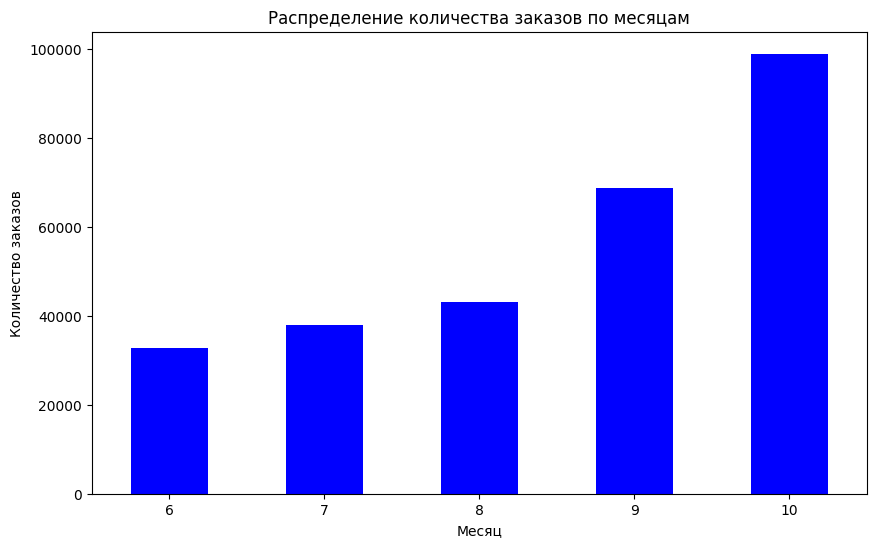

In [70]:
df_order_month.plot(kind='bar',
                    color='blue',
                    legend=False,
                    figsize=(10,6))

plt.title('Распределение количества заказов по месяцам')
plt.ylabel('Количество заказов')
plt.xlabel('Месяц')
plt.xticks(rotation=0)

plt.show()

Виден рост количества заказов от июня к ноябрю.

Сравним распределение заказов билетов по типам мероприятия для осеннего и летнего периодов.

In [71]:
df_order_season_event_pivot = pd.pivot_table(df, index='event_type_main_new', columns='season', values='order_id', aggfunc='count').reset_index()
df_order_season_event_pivot

season,event_type_main_new,лето,осень
0,выставки,4709,5761
1,другое,26026,29121
2,концерты,49955,62641
3,спорт,2758,18749
4,стендап,6344,6923
5,театр,23730,42784
6,ёлки,273,1689


In [72]:
df_order_season_event_pivot['order_summer_share'] = round(df_order_season_event_pivot['лето'] / df_order_season_event_pivot['лето'].sum(), 2)
df_order_season_event_pivot['order_autumn_share'] = round(df_order_season_event_pivot['осень'] / df_order_season_event_pivot['осень'].sum(),2)

df_season_event = df_order_season_event_pivot[['event_type_main_new', 'order_summer_share', 'order_autumn_share']]
df_season_event

season,event_type_main_new,order_summer_share,order_autumn_share
0,выставки,0.04,0.03
1,другое,0.23,0.17
2,концерты,0.44,0.37
3,спорт,0.02,0.11
4,стендап,0.06,0.04
5,театр,0.21,0.26
6,ёлки,0.00,0.01


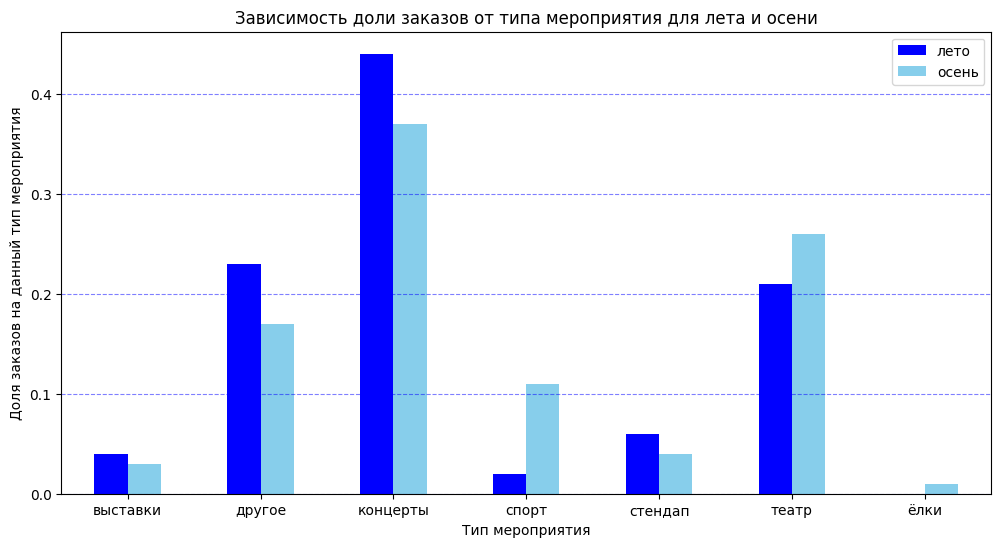

In [73]:
df_season_event.set_index('event_type_main_new')[['order_summer_share', 'order_autumn_share']].plot(kind='bar',
                                                                                                    figsize=(12,6),
                                                                                                    legend=True,
                                                                                                    rot=0,
                                                                                                    color=['blue', 'skyblue']
)

plt.xlabel('Тип мероприятия')
plt.ylabel('Доля заказов на данный тип мероприятия')
plt.title('Зависимость доли заказов от типа мероприятия для лета и осени')
plt.grid(True, color='blue', axis='y', linestyle='--', alpha=0.5)
plt.legend(['лето', 'осень'])

plt.show()

Самые большая доля заказов приходится на тип мероприятия "концерты" (0,44 и 0,37 для лета и осени соответственно). На тип "театр" приходится 21% и 26% для лета и осени соответственно. Тип мероприятия "другое": 23% и 17% для лета и осени соответственно. Доля других мероприятий значительно меньше. Доля типов мероприятий "концерт", "выставки", "стендап", "другое" уменьшается осенью по сравнению с летом. Доля спортивных, театральных мероприятий и ёлок растет осенью по сравнению с летом. 

Сравним распределение заказов билетов по типам устройств для осеннего и летнего периодов.

In [74]:
df_order_season_device_pivot = pd.pivot_table(df, index='device_type_canonical', columns='season', values='order_id', aggfunc='count').reset_index()
df_order_season_device_pivot

season,device_type_canonical,лето,осень
0,desktop,21738,34165
1,mobile,92057,133503


In [75]:
df_order_season_device_pivot['order_summer_share'] = round(df_order_season_device_pivot['лето'] / df_order_season_device_pivot['лето'].sum(), 2)
df_order_season_device_pivot['order_autumn_share'] = round(df_order_season_device_pivot['осень'] / df_order_season_device_pivot['осень'].sum(),2)

df_season_device = df_order_season_device_pivot[['device_type_canonical', 'order_summer_share', 'order_autumn_share']]
df_season_device

season,device_type_canonical,order_summer_share,order_autumn_share
0,desktop,0.19,0.2
1,mobile,0.81,0.8


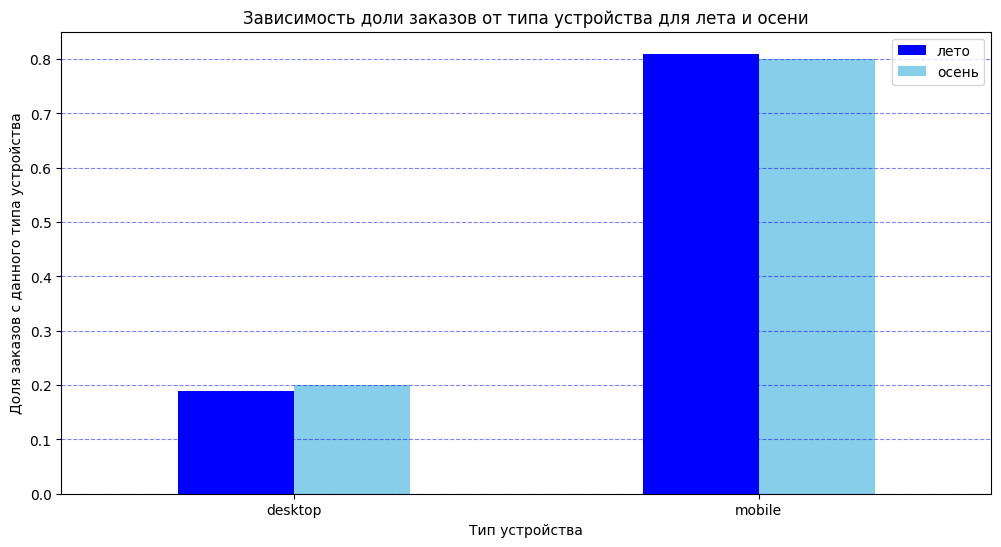

In [76]:
df_season_device.set_index('device_type_canonical')[['order_summer_share', 'order_autumn_share']].plot(kind='bar',
                                                                                                       figsize=(12,6),
                                                                                                       legend=True,
                                                                                                       rot=0,
                                                                                                       color=['blue', 'skyblue']
)

plt.xlabel('Тип устройства')
plt.ylabel('Доля заказов с данного типа устройства')
plt.title('Зависимость доли заказов от типа устройства для лета и осени')
plt.grid(True, color='blue', axis='y', linestyle='--', alpha=0.5)
plt.legend(['лето', 'осень'])

plt.show()

Доля заказов, сделанных с мобильных устройств значительно больше доли заказов, сделанных со стационарных устройств. При этом зависимости от сезонности практически не наблюдается.

Сравним распределение заказов билетов по возрастным категориям для осеннего и летнего периодов.

In [77]:
df_order_season_age_pivot = pd.pivot_table(df, index='age_limit', columns='season', values='order_id', aggfunc='count').reset_index()
df_order_season_age_pivot

season,age_limit,лето,осень
0,0,20635,39246
1,6,20871,29605
2,12,24169,37148
3,16,32366,44179
4,18,15754,17490


In [78]:
df_order_season_age_pivot['order_summer_share'] = round(df_order_season_age_pivot['лето'] / df_order_season_age_pivot['лето'].sum(), 2)
df_order_season_age_pivot['order_autumn_share'] = round(df_order_season_age_pivot['осень'] / df_order_season_age_pivot['осень'].sum(),2)

df_season_age = df_order_season_age_pivot[['age_limit', 'order_summer_share', 'order_autumn_share']]
df_season_age

season,age_limit,order_summer_share,order_autumn_share
0,0,0.18,0.23
1,6,0.18,0.18
2,12,0.21,0.22
3,16,0.28,0.26
4,18,0.14,0.10


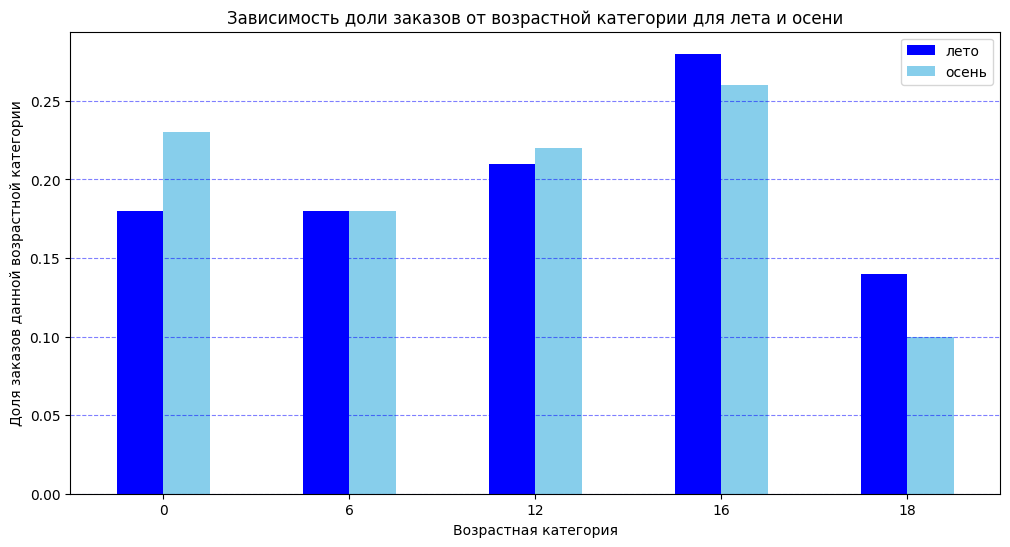

In [79]:
df_season_age.set_index('age_limit')[['order_summer_share', 'order_autumn_share']].plot(kind='bar',
                                                                                        figsize=(12,6),
                                                                                        legend=True,
                                                                                        rot=0,
                                                                                        color=['blue', 'skyblue']
)

plt.xlabel('Возрастная категория')
plt.ylabel('Доля заказов данной возрастной категории')
plt.title('Зависимость доли заказов от возрастной категории для лета и осени')
plt.grid(True, color='blue', axis='y', linestyle='--', alpha=0.5)
plt.legend(['лето', 'осень'])

plt.show()

Самая большая доля мероприятий приходится на возрастную категорию 16+ (28% и 26% соответственно для лета и осени). Следующие по объему категория 12+ (21% и 22% соответственно для лета и осени), 0+ (18% и 23% соответственно), 6+ (по 18%). Меньше всего мероприятий в категории 18% (14% и 10% соответственно). Доля мероприятий в категории 0+ на 5% выше осенью, чем летом. Также осенью по сравнению с летом увеличивается доля мероприятий в категории 12+. Доля мероприятий в категории 6+ не меняется осенью по сравнению с летом, а в категориях 16+ и 18+ уменьшается осенью по сравнению с летом.

Изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью.

In [80]:
df_ticket_revenue_event_pivot = pd.pivot_table(df, index='event_type_main_new', columns='season', values='one_ticket_revenue_rub', aggfunc='mean').reset_index()
df_ticket_revenue_event_pivot

season,event_type_main_new,лето,осень
0,выставки,54.278807,60.951562
1,другое,94.119445,81.981494
2,концерты,309.476551,268.206923
3,спорт,55.252391,50.285947
4,стендап,218.460480,231.124973
5,театр,215.914681,175.798791
6,ёлки,271.436176,229.564210


In [81]:
df_ticket_revenue_event_pivot['autumn_summer_diff'] = round((df_ticket_revenue_event_pivot['осень'] - df_ticket_revenue_event_pivot['лето']) / df_ticket_revenue_event_pivot['лето'], 2)
df_ticket_revenue_event_pivot

season,event_type_main_new,лето,осень,autumn_summer_diff
0,выставки,54.278807,60.951562,0.12
1,другое,94.119445,81.981494,-0.13
2,концерты,309.476551,268.206923,-0.13
3,спорт,55.252391,50.285947,-0.09
4,стендап,218.460480,231.124973,0.06
5,театр,215.914681,175.798791,-0.19
6,ёлки,271.436176,229.564210,-0.15


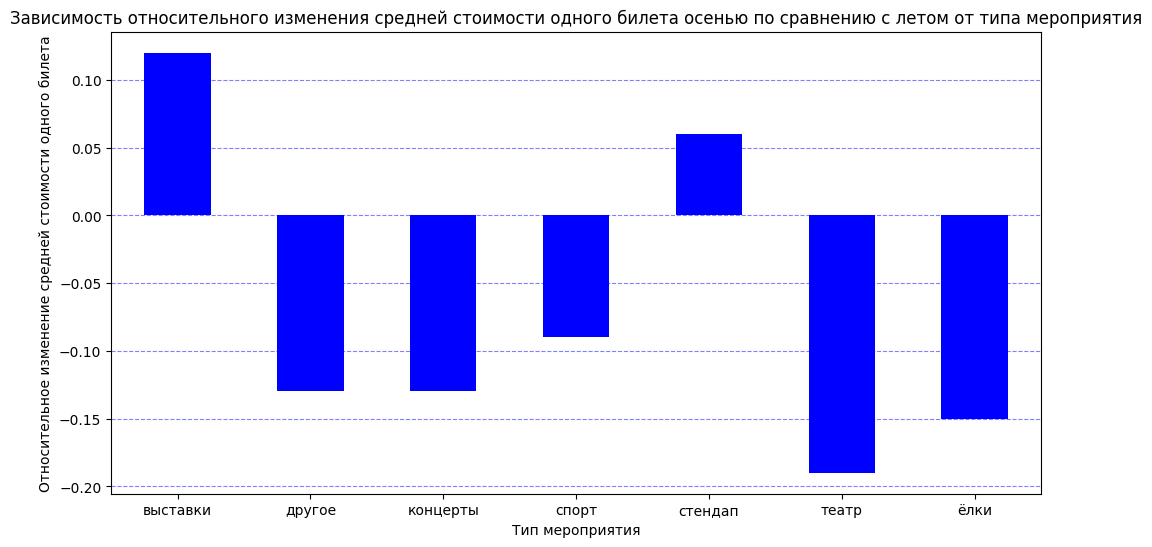

In [82]:
df_ticket_revenue_event_pivot.set_index('event_type_main_new')['autumn_summer_diff'].plot(kind='bar',
                                                                                        figsize=(12,6),
                                                                                        legend=False,
                                                                                        rot=0,
                                                                                        color='blue'
)

plt.xlabel('Тип мероприятия')
plt.ylabel('Относительное изменение средней стоимости одного билета')
plt.title('Зависимость относительного изменения средней стоимости одного билета осенью по сравнению с летом от типа мероприятия')
plt.grid(True, color='blue', axis='y', linestyle='--', alpha=0.5)

plt.show()

Средняя стоимость одного билета выросла для мероприятий типа "выставки" и "стендап". Для остальных типов мероприятий средняя стоимость одного билета осенью уменьшается по сравнению с летом.

#### Промежуточный вывод

- Количество заказов увеличивается от июня к ноябрю.  
- Доля типов мероприятий "концерт", "выставки", "стендап", "другое" уменьшается осенью по сравнению с летом. Доля спортивных и театральных мероприятий растет осенью по сравнению с летом. Мероприятий типа "ёлки" летом нет.  
- Зависимости доли заказов в разрезе типа устройств от сезонности практически не наблюдается.  
- Доля мероприятий в категориях 0+, 12+ на 5% выше осенью, чем летом. Доля мероприятий в категории 6+ не меняется осенью по сравнению с летом, а в категориях 16+ и 18+ уменьшается осенью по сравнению с летом.
- Средняя стоимость одного билета меньше осенью, чем летом для всех типов мероприятий, кроме "выставки" и "стендап".

### 3.2 Осенняя активность пользователей

Изучим изменение по дням общего числа заказов, количества активных пользователей DAU, среднего числа заказов на одного пользователя, средней стоимости одного билета за октябрь, ноябрь.

In [83]:
df_autumn = df[(df['month'] == 9) | (df['month'] == 10)]
df_autumn_group = df_autumn.groupby('created_dt_msk').agg({'order_id': 'count',
                                                           'user_id': 'nunique',
                                                           'one_ticket_revenue_rub': 'mean',
                                                           'revenue_rub': 'sum'})
df_autumn_group.head()

,order_id,user_id,one_ticket_revenue_rub,revenue_rub
created_dt_msk,,,,
2024-09-01,1314,555,202.149078,726205.91
2024-09-02,1368,571,191.092052,703396.29
2024-09-03,5088,776,80.492615,1151207.94
2024-09-04,1756,682,179.334387,855702.96
2024-09-05,1936,738,190.156533,986632.38


In [84]:
df_autumn_group['order_per_user'] = df_autumn_group['order_id'] / df_autumn_group['user_id']
df_autumn_group = df_autumn_group[['order_id', 'user_id', 'order_per_user', 'one_ticket_revenue_rub', 'revenue_rub']]
df_autumn_group.head()

,order_id,user_id,order_per_user,one_ticket_revenue_rub,revenue_rub
created_dt_msk,,,,,
2024-09-01,1314,555,2.367568,202.149078,726205.91
2024-09-02,1368,571,2.395797,191.092052,703396.29
2024-09-03,5088,776,6.556701,80.492615,1151207.94
2024-09-04,1756,682,2.574780,179.334387,855702.96
2024-09-05,1936,738,2.623306,190.156533,986632.38


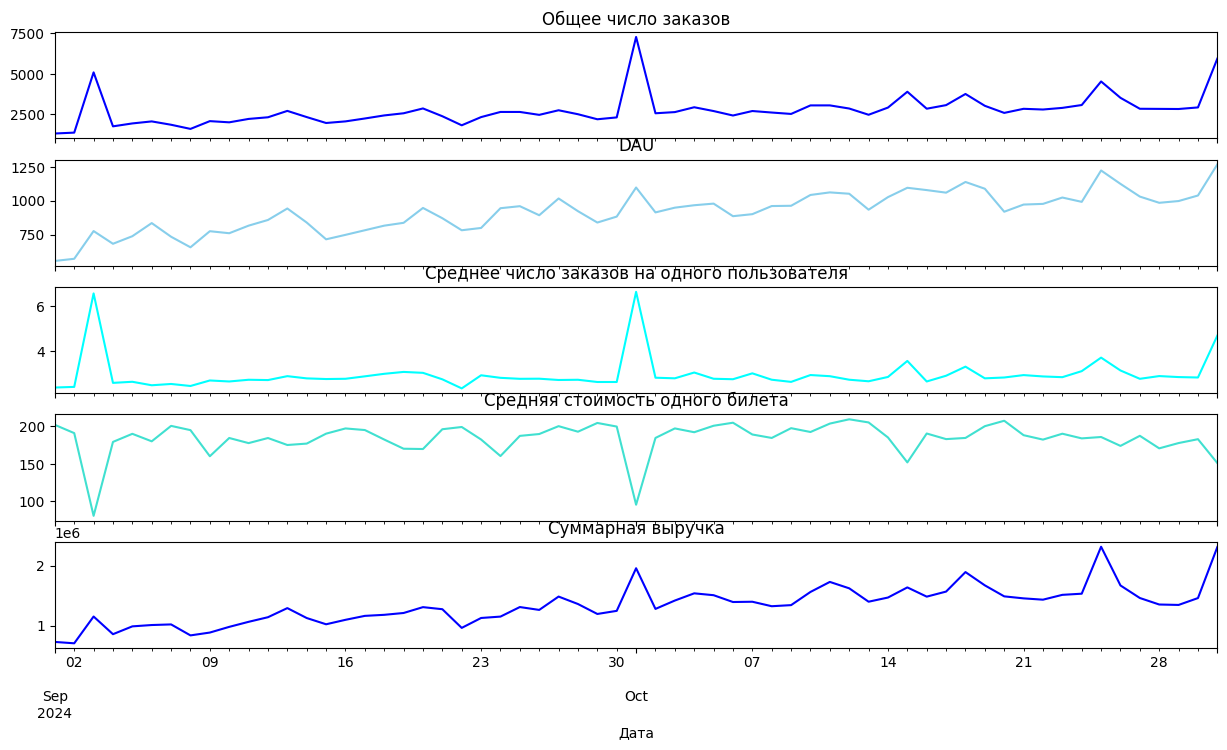

In [85]:

df_autumn_group.plot(kind='line',
                     subplots=True,
                     sharex=True,
                     sharey=False,
                     rot=0,
                     figsize=(15,8),
                     legend=False,
                     color=['blue', 'skyblue', 'aqua', 'turquoise'],
                     title=['Общее число заказов', 'DAU', 'Среднее число заказов на одного пользователя', 'Средняя стоимость одного билета', 'Суммарная выручка'],
                     xlabel='Дата')


plt.show()

Общее число заказов растет от  начала сентября к концу октября. 3 сентября, 1 октября, 31 октября наблюдаются резкие пики. Кроме того, есть менее ярко выраженные пики 13-го, 20-го сентября, 15-го, 17-го и 24-го октября. Количество активных пользователей (DAU) также растет от начала сентября к концу октября. Пики на графике DAU повторяют пики на графике общего числа заказов, но не являются такими ярко выраженными. График среднего числа заказов на одного пользователя повторяет по форме график для общего числа заказов. Пики наблюдаются в то же время и выражены так же сильно, как на графике для общего числа заказов. При этом на графике средней стоимости одного билета видно, что в даты сильного роста общего числа заказов и среднего числа заказов на пользователя происходит уменьшение стоимости билета. В моменты резких пиков числа заказов, стоимость билета также резко уменьшается. Возможно, что причиной пиковых значений числа заказов и количества активных пользователей являлись какие-то мероприятия, связанные со скидками на билеты. По графику суммарной выручки видно, что хотя она в целом растет от сентября к октябрю, но пиковые значения совпадают с пиковыми значениями роста числа заказов и падения стоимости билета.

Изучим недельную цикличность пользовательской активности.

In [86]:
df_autumn = df[(df['month'] == 9) | (df['month'] == 10)]
df_autumn_week_group = df_autumn.groupby('day_of_week').agg({'order_id': 'count',
                                                             'user_id': 'nunique'
                                                             }).sort_values(by='day_of_week').reset_index()
df_autumn_week_group

,day_of_week,order_id,user_id
0,1,21433,4431
1,2,31377,4784
2,3,22795,4805
3,4,27040,4960
4,5,24648,4843
5,6,21163,4522
6,7,19212,4342


In [87]:
df_autumn_week_group['order_per_user'] = df_autumn_week_group['order_id'] / df_autumn_week_group['user_id']
df_autumn_week_group

,day_of_week,order_id,user_id,order_per_user
0,1,21433,4431,4.837057
1,2,31377,4784,6.558737
2,3,22795,4805,4.744017
3,4,27040,4960,5.451613
4,5,24648,4843,5.089407
5,6,21163,4522,4.680009
6,7,19212,4342,4.424689


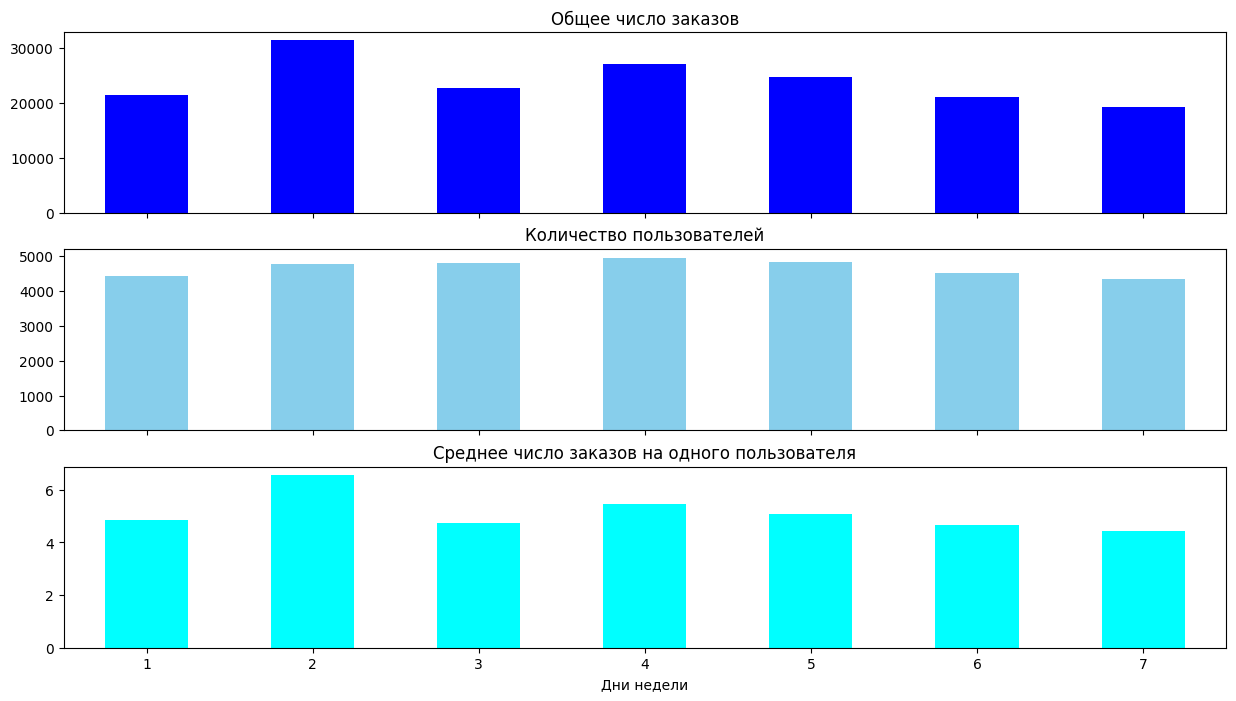

In [88]:
df_autumn_week_group.plot.bar(x='day_of_week',
                              y=['order_id', 'user_id', 'order_per_user'],
                              subplots=True,
                              sharex=True,
                              sharey=False,
                              rot=0,
                              figsize=(15,8),
                              legend=False,
                              color=['blue', 'skyblue', 'aqua'],
                              title=['Общее число заказов', 'Количество пользователей', 'Среднее число заказов на одного пользователя'],
                              xlabel='Дни недели')
plt.show()

Самое большое значение общего числа заказов и среднего числа заказов на пользователя по вторника. Второе место занимает четверг. Самое меньшее количество заказов приходится на выходные. При этом количество пользователей растет от понедельника к четвергу и падает к выходным.

#### Промежуточный вывод  

- Даты резкого роста количества заказов, DAU, среднего числа заказов на пользователя и суммарной выручки совпадают с датами резкого уменьшения стоимости одного билета.
- Общее количество заказов, среднее число заказов на пользователя и количество пользователей на выходных меньше, чем в будни.

### 3.3 Популярные события и партнёры

Посчитаем количество уникальных событий, количество заказов и суммарную выручку для каждого региона по данным за сентябрь-октябрь.

In [89]:
df_region_pivot = pd.pivot_table(df_autumn, index='region_name', values=['event_id', 'order_id', 'revenue_rub'], aggfunc={'event_id': 'nunique',
                                                                                                                          'order_id': 'count',
                                                                                                                          'revenue_rub': 'sum'}).reset_index()


Отсортируем таблицу по количеству уникальных мероприятий.

In [90]:
df_region_pivot_sort_event = df_region_pivot.sort_values(by='event_id', ascending=False)
pd.options.display.max_rows = 100

display(df_region_pivot_sort_event)

,region_name,event_id,order_id,revenue_rub
23,Каменевский регион,3893,46538,28584051.37
59,Североярская область,2594,20559,10461877.77
75,Широковская область,794,8643,4227755.84
56,Светополянский округ,755,4742,1980947.32
51,Речиновская область,529,3562,1740608.16
60,Серебринская область,456,4467,1562718.77
76,Яблоневская область,431,4193,1943331.88
67,Тепляковская область,419,2482,769483.25
11,Горицветская область,406,3229,1114380.03
63,Солнечноземская область,401,4191,862762.93


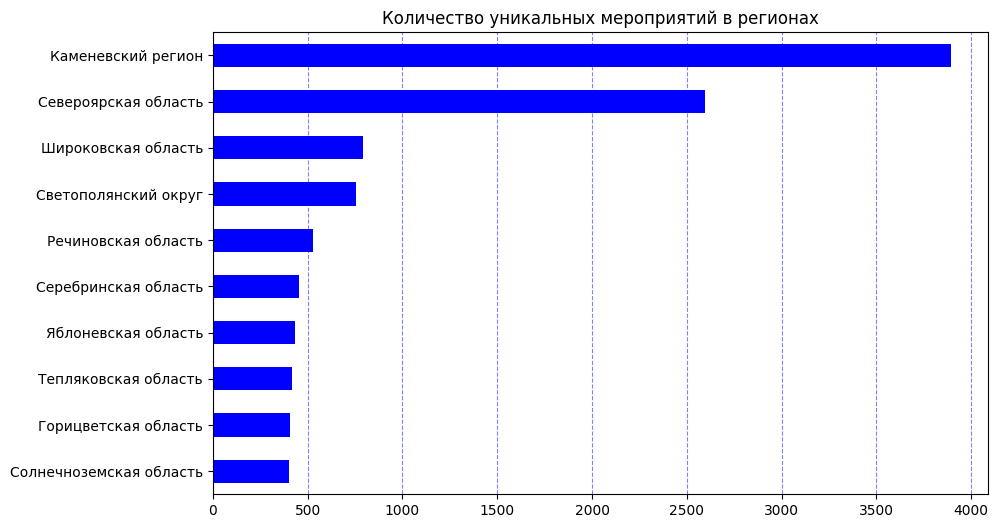

In [91]:
df_region_top_event = df_region_pivot_sort_event.head(10)
df_region_top_event.sort_values(by='event_id').plot.barh(x='region_name',
                                                     y='event_id',
                                                     figsize=(10,6),
                                                     color='blue',
                                                     title='Количество уникальных мероприятий в регионах',
                                                     xlabel='',
                                                     ylabel='Количество уникальных мероприятий',
                                                     legend=False)

plt.grid(True, color='blue', axis='x', linestyle='--', alpha=0.5)

plt.show()

Лидером по количеству уникальных мероприятий является Каменевский регион (3893). За ним идут Североярская область (2594), Широковская область (794) и Светополянский округ (755). Разница между лидерами рейтинга и большинством регионов велика. В большинстве регионов менее, чем по 300 уникальных мероприятий. У регионов, находящихся в конце рейтинга количество уникальных мероприятий меньше 10.

Отсортируем таблицу по количеству заказов.

In [92]:
df_region_pivot_sort_order = df_region_pivot.sort_values(by='order_id', ascending=False)
df_region_pivot_sort_order

,region_name,event_id,order_id,revenue_rub
23,Каменевский регион,3893,46538,28584051.37
59,Североярская область,2594,20559,10461877.77
41,Медовская область,361,12021,2340788.77
75,Широковская область,794,8643,4227755.84
44,Озернинский край,296,7478,6632333.93
56,Светополянский округ,755,4742,1980947.32
60,Серебринская область,456,4467,1562718.77
40,Малиновоярский округ,137,4412,3365824.81
76,Яблоневская область,431,4193,1943331.88
63,Солнечноземская область,401,4191,862762.93


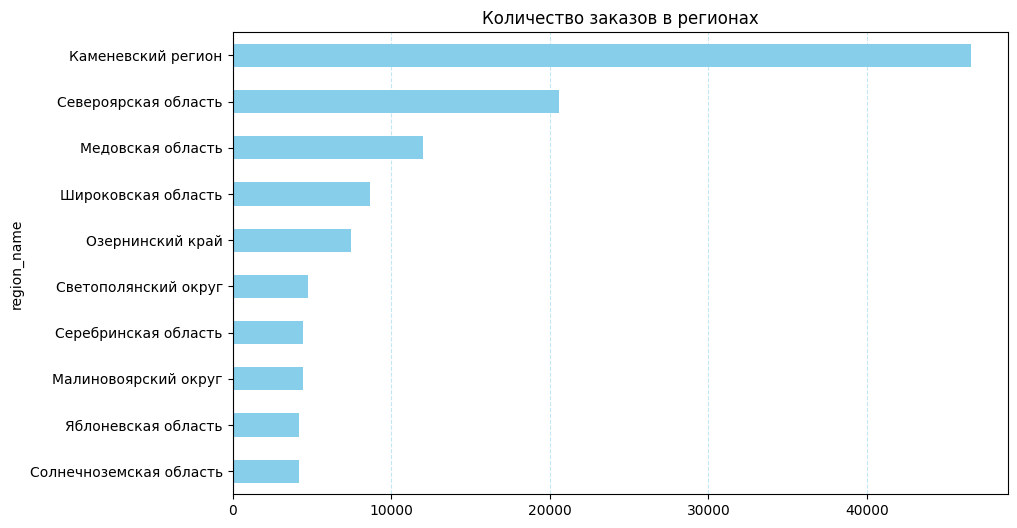

In [93]:
df_region_top_order = df_region_pivot_sort_order.head(10)
df_region_top_order.sort_values(by='order_id').plot.barh(x='region_name',
                                                     y='order_id',
                                                     figsize=(10,6),
                                                     color='skyblue',
                                                     title='Количество заказов в регионах',
                                                     ylabel='Количество заказов',
                                                     legend=False)

plt.grid(True, color='skyblue', axis='x', linestyle='--', alpha=0.5)

plt.show()

Первые три места по количеству заказов также занимают Каменевский регион (46538), Североярская (20559) и Медовская (12021) области. В Широковской области 8643 заказа. В большинстве регионов меньше, чем по 5000 заказов. В регионах, находящихся в конце рейтинга менее, чем по 20 заказов.

Отсортируем таблицу по суммарной выручке.

In [94]:
df_region_pivot_sort_revenue = df_region_pivot.sort_values(by='revenue_rub', ascending=False)
df_region_pivot_sort_revenue

,region_name,event_id,order_id,revenue_rub
23,Каменевский регион,3893,46538,28584051.37
59,Североярская область,2594,20559,10461877.77
44,Озернинский край,296,7478,6632333.93
75,Широковская область,794,8643,4227755.84
40,Малиновоярский округ,137,4412,3365824.81
41,Медовская область,361,12021,2340788.77
56,Светополянский округ,755,4742,1980947.32
76,Яблоневская область,431,4193,1943331.88
51,Речиновская область,529,3562,1740608.16
38,Лугоградская область,180,2979,1610430.96


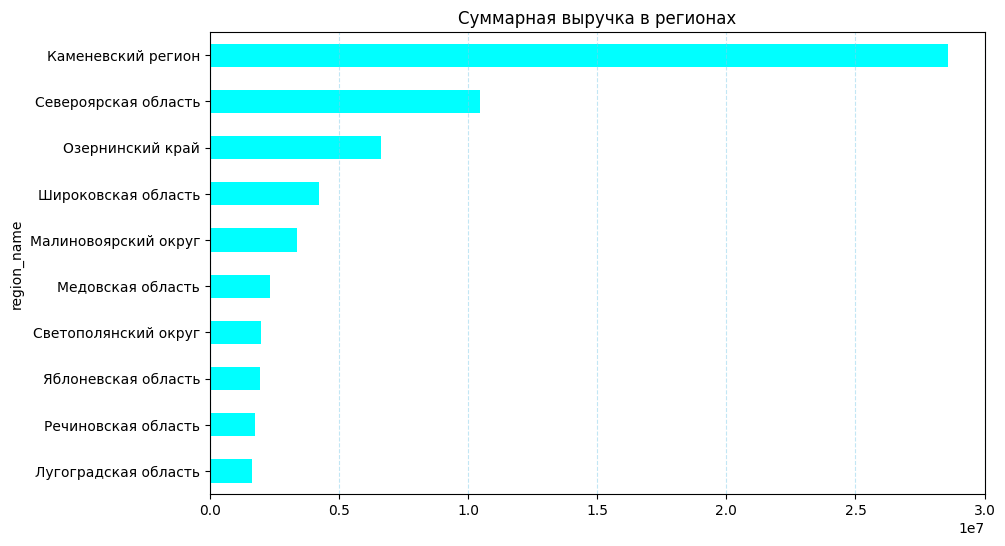

In [95]:
df_region_top_revenue = df_region_pivot_sort_revenue.head(10)
df_region_top_revenue.sort_values(by='revenue_rub').plot.barh(x='region_name',
                                                                     y='revenue_rub',
                                                                     figsize=(10,6),
                                                                     color='aqua',
                                                                     title='Суммарная выручка в регионах',
                                                                     ylabel='Суммарная выручка',
                                                                     legend=False)

plt.grid(True, color='skyblue', axis='x', linestyle='--', alpha=0.5)

plt.show()

Лидерами по суммарной выручке также являются Каменевский регион (28 584 051 руб.) и Североярская область (10 461 878 руб.). Следующие места занимают Озернинский край (6 632 333 руб.) и Широковская область (4 227 756 руб.). В большинстве регионов выручка менее миллиона. У регионов в конце рейтинга суммарная выручка менее 10 000 руб.

Посчитаем долю проводимых в регионе мероприятий от их общего числа, долю количества заказов от общего количества заказов и долю суммарной выручки для каждого региона.

In [96]:
df_region_pivot['event_share'] = round(df_region_pivot['event_id'] / df['event_id'].nunique(), 2)
df_region_pivot['order_share'] = round(df_region_pivot['order_id'] / df_region_pivot['order_id'].sum(), 2)
df_region_pivot['revenue_share'] = round(df_region_pivot['revenue_rub'] / df_region_pivot['revenue_rub'].sum(), 2)

Отсортируем таблицу по доле уникальных мероприятий.

In [97]:
df_region_pivot_sort_event_share = df_region_pivot.sort_values(by='event_share', ascending=False)
df_region_pivot_sort_event_share

,region_name,event_id,order_id,revenue_rub,event_share,order_share,revenue_share
23,Каменевский регион,3893,46538,28584051.37,0.18,0.28,0.35
59,Североярская область,2594,20559,10461877.77,0.12,0.12,0.13
75,Широковская область,794,8643,4227755.84,0.04,0.05,0.05
56,Светополянский округ,755,4742,1980947.32,0.03,0.03,0.02
63,Солнечноземская область,401,4191,862762.93,0.02,0.02,0.01
67,Тепляковская область,419,2482,769483.25,0.02,0.01,0.01
60,Серебринская область,456,4467,1562718.77,0.02,0.03,0.02
11,Горицветская область,406,3229,1114380.03,0.02,0.02,0.01
51,Речиновская область,529,3562,1740608.16,0.02,0.02,0.02
72,Травяная область,351,2060,790801.85,0.02,0.01,0.01


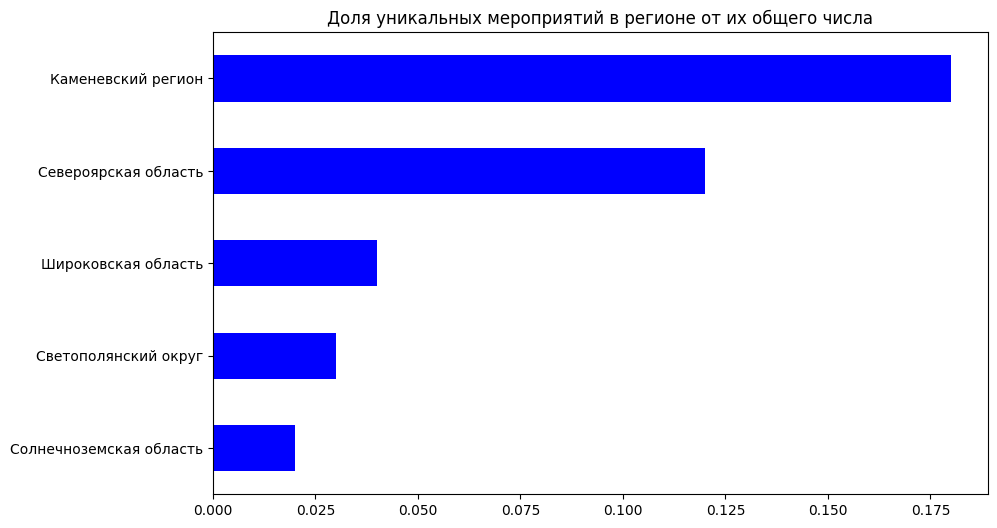

In [98]:
df_region_top_event_share = df_region_pivot_sort_event_share.head()
df_region_top_event_share.sort_values(by='event_share').plot.barh(x='region_name',
                                                        y='event_share',
                                                        figsize=(10,6),
                                                        color='blue',
                                                        title='Доля уникальных мероприятий в регионе от их общего числа',
                                                        xlabel='',
                                                        ylabel='Доля мероприятий от их общего числа',
                                                        legend=False)
plt.show()

In [99]:
print(f'Доля регионов, в которых проводится менее 1% уникальных мероприятий от их общего количества: {round(df_region_pivot[df_region_pivot.event_share < 0.01].region_name.count() / df_region_pivot.shape[0], 2)}')

Доля регионов, в которых проводится менее 1% уникальных мероприятий от их общего количества: 0.68


В Каменевском регионе проводится 18% уникальных мероприятий от общего количества уникальных мероприятий. В Североярской области 12%. В каждом из остальных регионах проводится менее 10% уникальных мероприятий от их общего количеста. А в большинстве регионов менее 1%.

Отсортируем таблицу по доле заказов.

In [100]:
df_region_pivot_sort_order_share = df_region_pivot.sort_values(by='order_share', ascending=False)
df_region_pivot_sort_order_share

,region_name,event_id,order_id,revenue_rub,event_share,order_share,revenue_share
23,Каменевский регион,3893,46538,28584051.37,0.18,0.28,0.35
59,Североярская область,2594,20559,10461877.77,0.12,0.12,0.13
41,Медовская область,361,12021,2340788.77,0.02,0.07,0.03
75,Широковская область,794,8643,4227755.84,0.04,0.05,0.05
44,Озернинский край,296,7478,6632333.93,0.01,0.04,0.08
60,Серебринская область,456,4467,1562718.77,0.02,0.03,0.02
76,Яблоневская область,431,4193,1943331.88,0.02,0.03,0.02
40,Малиновоярский округ,137,4412,3365824.81,0.01,0.03,0.04
56,Светополянский округ,755,4742,1980947.32,0.03,0.03,0.02
51,Речиновская область,529,3562,1740608.16,0.02,0.02,0.02


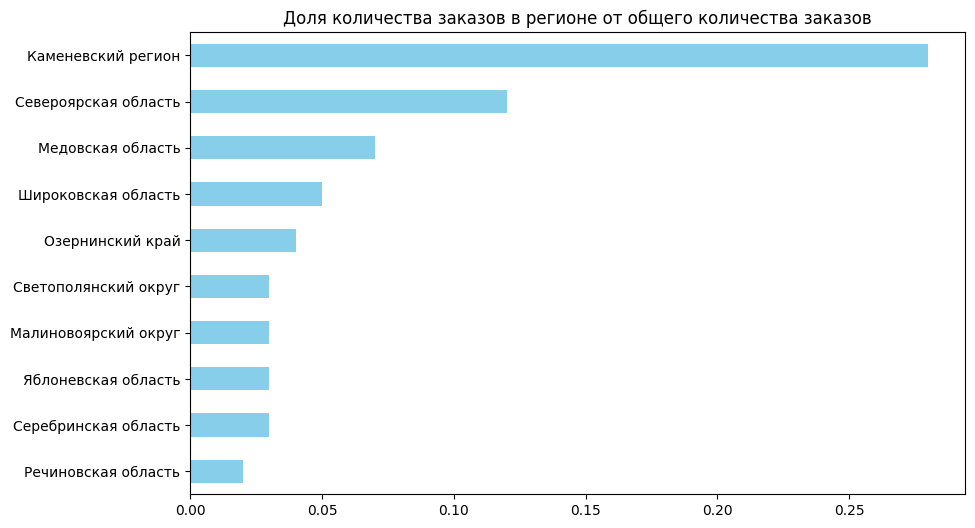

In [101]:
df_region_top_order_share = df_region_pivot_sort_order_share.head(10)
df_region_top_order_share.sort_values(by='order_share').plot.barh(x='region_name',
                                                                         y='order_share',
                                                                         figsize=(10,6),
                                                                         color='skyblue',
                                                                         title='Доля количества заказов в регионе от общего количества заказов',
                                                                         xlabel='',
                                                                         ylabel='Доля заказов от общего количества заказов',
                                                                         legend=False)
plt.show()

In [102]:
print(f'Доля регионов, для которых процент заказов от общего количества заказов менее 1%: {round(df_region_pivot[df_region_pivot.order_share < 0.01].region_name.count() / df_region_pivot.shape[0], 2)}')

Доля регионов, для которых процент заказов от общего количества заказов менее 1%: 0.63


Самый большой процент заказов от общего количества заказов приходится на Каменевский регион (28%), Североярскую область (12%): в сумме 40% от общего числа заказов. В Медовской области 7% от общего числа заказов, в Широковской области 5%. В остальных регионах доли заказов меньше 5%. В большинстве регионов доля заказов от общего количества заказов менее 1%.

Отсортируем таблицу по доле суммарной выручки.

In [103]:
df_region_pivot_sort_revenue_share = df_region_pivot.sort_values(by='revenue_share', ascending=False)
df_region_pivot_sort_revenue_share

,region_name,event_id,order_id,revenue_rub,event_share,order_share,revenue_share
23,Каменевский регион,3893,46538,28584051.37,0.18,0.28,0.35
59,Североярская область,2594,20559,10461877.77,0.12,0.12,0.13
44,Озернинский край,296,7478,6632333.93,0.01,0.04,0.08
75,Широковская область,794,8643,4227755.84,0.04,0.05,0.05
40,Малиновоярский округ,137,4412,3365824.81,0.01,0.03,0.04
41,Медовская область,361,12021,2340788.77,0.02,0.07,0.03
56,Светополянский округ,755,4742,1980947.32,0.03,0.03,0.02
60,Серебринская область,456,4467,1562718.77,0.02,0.03,0.02
51,Речиновская область,529,3562,1740608.16,0.02,0.02,0.02
38,Лугоградская область,180,2979,1610430.96,0.01,0.02,0.02


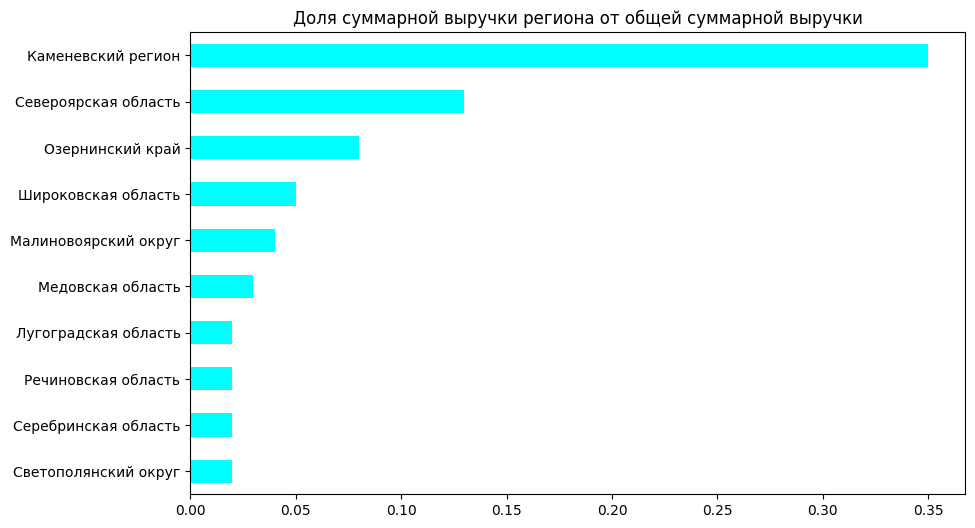

In [104]:
df_region_top_revenue_share = df_region_pivot_sort_revenue_share.head(10)
df_region_top_revenue_share.sort_values(by='revenue_share').plot.barh(x='region_name',
                                                                         y='revenue_share',
                                                                         figsize=(10,6),
                                                                         color='aqua',
                                                                         title='Доля суммарной выручки региона от общей суммарной выручки',
                                                                         xlabel='',
                                                                         ylabel='Доля суммарной выручки',
                                                                         legend=False)
plt.show()

In [105]:
print(f'Доля регионов, для которых процент суммарной выручки менее 1%: {round(df_region_pivot[df_region_pivot.revenue_share < 0.01].region_name.count() / df_region_pivot.shape[0], 2)}')

Доля регионов, для которых процент суммарной выручки менее 1%: 0.67


Каменевский регион (35%) и Североярская область (13%) вместе приносят 48% суммарной выручки. Для более чем половины регионов процент их суммарной выручки от общей выручки менее 1%.

Для каждого билетного партнера посчитаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов по данным за сентябрь - октябрь 2024.

In [106]:
df_organizers_pivot = pd.pivot_table(df_autumn, index='service_name', values=['event_id', 'order_id', 'revenue_rub'], aggfunc={'event_id': 'nunique',
                                                                                                                      'order_id': 'count',
                                                                                                                      'revenue_rub': 'sum'}).reset_index()


Отсортируем таблицу по количеству уникальных событий на каждого партнера.

In [107]:
df_org_sort_event = df_organizers_pivot.sort_values(by='event_id', ascending=False).head(10)
df_org_sort_event

,service_name,event_id,order_id,revenue_rub
21,Лови билет!,3584,25690,1.037474e+07
3,Билеты без проблем,2818,31927,1.204837e+07
5,Билеты в руки,2445,25517,7.609392e+06
25,Облачко,1409,15478,1.061105e+07
22,Лучшие билеты,1377,12334,1.672689e+06
24,Мой билет,1002,19382,1.082962e+07
30,Тебе билет!,858,3748,2.137906e+06
26,Прачечная,728,5796,2.546915e+06
8,Весь в билетах,599,9401,9.321181e+06
34,Яблоко,537,3473,2.763332e+06


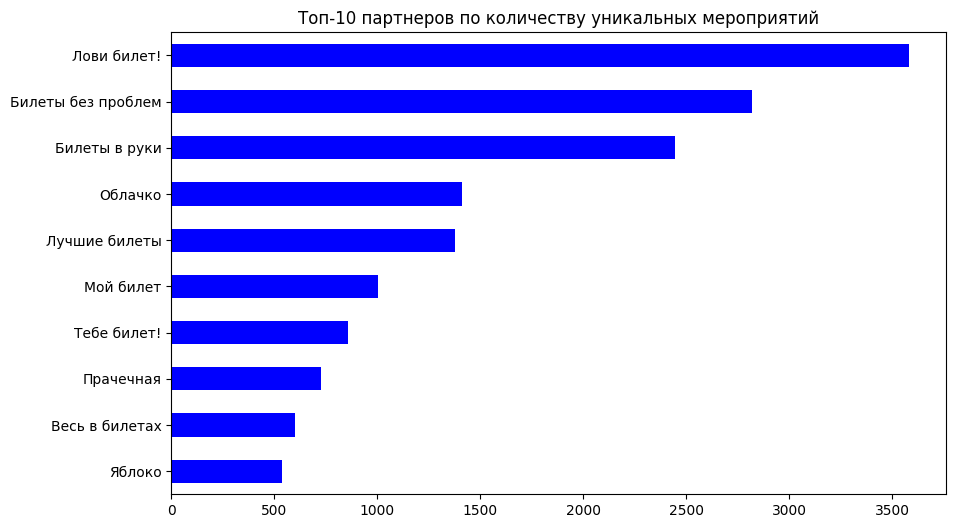

In [108]:
df_org_sort_event.sort_values(by='event_id').plot.barh(x='service_name',
                                                       y='event_id',
                                                       figsize=(10,6),
                                                       color='blue',
                                                       title='Топ-10 партнеров по количеству уникальных мероприятий',
                                                       xlabel='',
                                                       ylabel='Количество уникальных мероприятий',
                                                       legend=False)

plt.show()

Самое большое разнообразие событий у партнеров: "Лови билет!" (3584), "Билеты без проблем" (2818), "Билеты в руки" (2445).

Отсортируем таблицу по количеству заказов у партнеров.

In [109]:
df_org_sort_order = df_organizers_pivot.sort_values(by='order_id', ascending=False).head(10)
df_org_sort_order

,service_name,event_id,order_id,revenue_rub
3,Билеты без проблем,2818,31927,1.204837e+07
21,Лови билет!,3584,25690,1.037474e+07
5,Билеты в руки,2445,25517,7.609392e+06
24,Мой билет,1002,19382,1.082962e+07
25,Облачко,1409,15478,1.061105e+07
22,Лучшие билеты,1377,12334,1.672689e+06
8,Весь в билетах,599,9401,9.321181e+06
26,Прачечная,728,5796,2.546915e+06
30,Тебе билет!,858,3748,2.137906e+06
34,Яблоко,537,3473,2.763332e+06


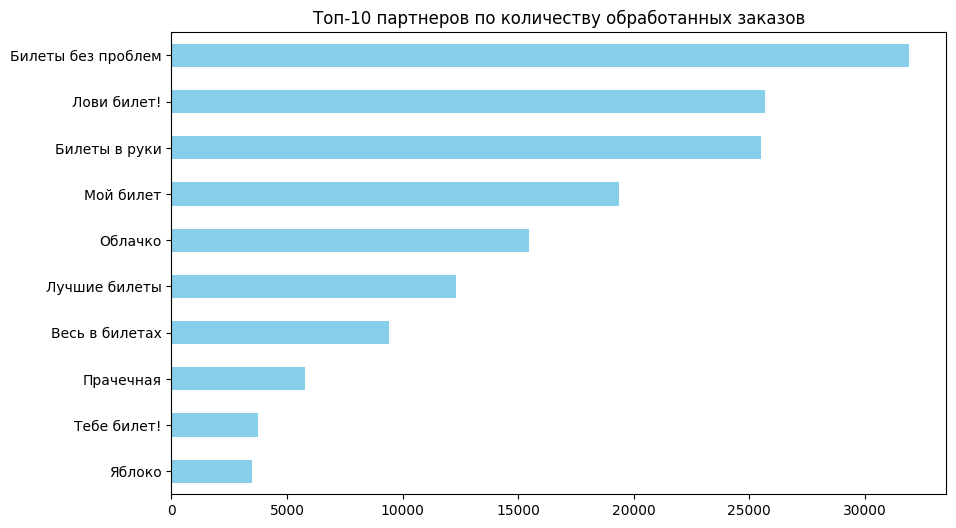

In [110]:
df_org_sort_order.sort_values(by='order_id').plot.barh(x='service_name',
                                                       y='order_id',
                                                       figsize=(10,6),
                                                       color='skyblue',
                                                       title='Топ-10 партнеров по количеству обработанных заказов',
                                                       xlabel='',
                                                       ylabel='Количество заказов',
                                                       legend=False)

plt.show()

Наибольшее количество заказов у партнеров: "Билеты без проблем" (31927), "Лови билет!" (25690), "Билеты в руки" (25517).

Отсортируем таблицу по суммарной выручке.

In [111]:
df_org_sort_revenue = df_organizers_pivot.sort_values(by='revenue_rub', ascending=False).head(10)
df_org_sort_revenue.style.format({'revenue_rub': "{:.0f}"})

,service_name,event_id,order_id,revenue_rub
3,Билеты без проблем,2818,31927,12048370
24,Мой билет,1002,19382,10829617
25,Облачко,1409,15478,10611052
21,Лови билет!,3584,25690,10374744
8,Весь в билетах,599,9401,9321181
5,Билеты в руки,2445,25517,7609392
19,Край билетов,193,2996,3016152
34,Яблоко,537,3473,2763332
26,Прачечная,728,5796,2546915
30,Тебе билет!,858,3748,2137906


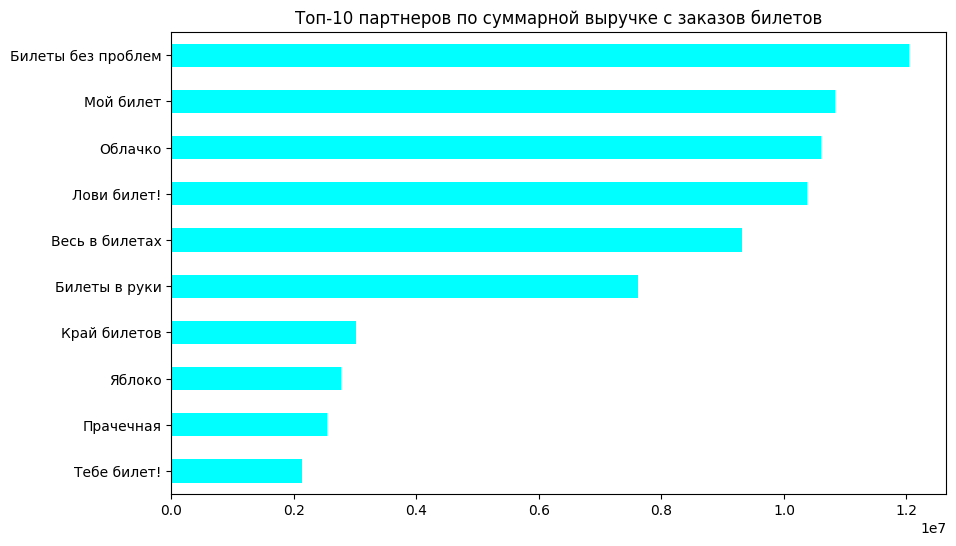

In [112]:
df_org_sort_revenue.sort_values(by='revenue_rub').plot.barh(x='service_name',
                                                       y='revenue_rub',
                                                       figsize=(10,6),
                                                       color='aqua',
                                                       title='Топ-10 партнеров по суммарной выручке с заказов билетов',
                                                       xlabel='',
                                                       ylabel='Суммарная выручка с заказов билетов',
                                                       legend=False)

plt.show()

Самую большую выручки приносят продажи билетов партнеров: "Билеты без проблем" (12 048 370 руб.), "Мой билет" (10 829 617 руб.), "Облачко" (10 611 052 руб.) и "Лови билет!" (10 374 744 руб.).

In [113]:
df_organizers_pivot['event_share'] = df_organizers_pivot['event_id'] / df['event_id'].nunique()
df_organizers_pivot['order_share'] = df_organizers_pivot['order_id'] / df_organizers_pivot['order_id'].sum()
df_organizers_pivot['revenue_share'] = df_organizers_pivot['revenue_rub'] / df_organizers_pivot['revenue_rub'].sum()

Отсортируем таблицу по доле уникальных событий.

In [114]:
df_org_sort_event_share = df_organizers_pivot.sort_values(by='event_share', ascending=False).head(10)
df_org_sort_event_share

,service_name,event_id,order_id,revenue_rub,event_share,order_share,revenue_share
21,Лови билет!,3584,25690,1.037474e+07,0.162909,0.153219,0.127048
3,Билеты без проблем,2818,31927,1.204837e+07,0.128091,0.190418,0.147543
5,Билеты в руки,2445,25517,7.609392e+06,0.111136,0.152188,0.093184
25,Облачко,1409,15478,1.061105e+07,0.064045,0.092313,0.129942
22,Лучшие билеты,1377,12334,1.672689e+06,0.062591,0.073562,0.020484
24,Мой билет,1002,19382,1.082962e+07,0.045545,0.115597,0.132618
30,Тебе билет!,858,3748,2.137906e+06,0.039000,0.022354,0.026181
26,Прачечная,728,5796,2.546915e+06,0.033091,0.034568,0.031189
8,Весь в билетах,599,9401,9.321181e+06,0.027227,0.056069,0.114146
34,Яблоко,537,3473,2.763332e+06,0.024409,0.020714,0.033840


Сервис "Лови билет!" представляет доступ к 16.3% от всего количества уникальных мероприятий, "Билеты без проблем" - к 12,8%, "Билеты в руки" - 15,2%. 

Отсортируем таблицу по доле заказов от общего количества заказов.

In [115]:
df_org_sort_order_share = df_organizers_pivot.sort_values(by='order_share', ascending=False).head(10)
df_org_sort_order_share

,service_name,event_id,order_id,revenue_rub,event_share,order_share,revenue_share
3,Билеты без проблем,2818,31927,1.204837e+07,0.128091,0.190418,0.147543
21,Лови билет!,3584,25690,1.037474e+07,0.162909,0.153219,0.127048
5,Билеты в руки,2445,25517,7.609392e+06,0.111136,0.152188,0.093184
24,Мой билет,1002,19382,1.082962e+07,0.045545,0.115597,0.132618
25,Облачко,1409,15478,1.061105e+07,0.064045,0.092313,0.129942
22,Лучшие билеты,1377,12334,1.672689e+06,0.062591,0.073562,0.020484
8,Весь в билетах,599,9401,9.321181e+06,0.027227,0.056069,0.114146
26,Прачечная,728,5796,2.546915e+06,0.033091,0.034568,0.031189
30,Тебе билет!,858,3748,2.137906e+06,0.039000,0.022354,0.026181
34,Яблоко,537,3473,2.763332e+06,0.024409,0.020714,0.033840


In [116]:
round(df_org_sort_order_share.order_share.sum() * 100, 2)

91.1

На долю сервисов "Билеты без проблем" (19%), "Лови билет!"(15,3%) и "Билет в руки" (15,2%) суммарно приходится 49,5% всех заказов. На долю партнеров из топ-10 по количеству заказов суммарно приходится 91,1% всех заказов.

Отсортируем таблицу по доле выручки.

In [117]:
df_org_sort_revenue_share = df_organizers_pivot.sort_values(by='revenue_share', ascending=False).head(10)
df_org_sort_revenue_share

,service_name,event_id,order_id,revenue_rub,event_share,order_share,revenue_share
3,Билеты без проблем,2818,31927,1.204837e+07,0.128091,0.190418,0.147543
24,Мой билет,1002,19382,1.082962e+07,0.045545,0.115597,0.132618
25,Облачко,1409,15478,1.061105e+07,0.064045,0.092313,0.129942
21,Лови билет!,3584,25690,1.037474e+07,0.162909,0.153219,0.127048
8,Весь в билетах,599,9401,9.321181e+06,0.027227,0.056069,0.114146
5,Билеты в руки,2445,25517,7.609392e+06,0.111136,0.152188,0.093184
19,Край билетов,193,2996,3.016152e+06,0.008773,0.017869,0.036936
34,Яблоко,537,3473,2.763332e+06,0.024409,0.020714,0.033840
26,Прачечная,728,5796,2.546915e+06,0.033091,0.034568,0.031189
30,Тебе билет!,858,3748,2.137906e+06,0.039000,0.022354,0.026181


In [118]:
round(df_org_sort_revenue_share.revenue_share.sum() * 100, 2)

87.26

Самый большой процент выручки приносят продажи билетов партнеров: "Билеты без проблем" (14,8%), "Мой билет"(13,3%), "Облачко"(13%) и "Лови билет!" (12,7%). Суммарно это 53,8% выручки.
На долю партнеров из топ-10 по выручке суммарно приходится 87,26% всей выручки.

#### Промежуточный вывод.


- Лидерами по разнообразию мероприятий, количеству заказов и суммарной выручке являются Каменевский регион и Североярская область. 40% заказов и 48% суммарной выручки приходится на их долю. В каждом из большинства регионов проводятся менее 1% от количества уникальных мероприятий. В большинстве регионов доля заказов региона от общего количества заказов менее 1%. Более чем в половине регионов (67%) процент их суммарной выручки от общей выручки составляет менее 1%.

- Лидерами по разнообразию мероприятий и количеству заказов являются партнеры "Лови билет!", "Билеты без проблем", "Билеты в руки". На из долю суммарно приходится 49,5% от всех заказов. Лидерами по выручке являются партнеры "Билеты без проблем", "Мой билет", "Облачко"  и "Лови билет!". На их долю приходится 53,8% выручки.


## 4. Статистический анализ данных

### 4.1 Проверка гипотезы о среднем количестве заказов на одного пользователя для разных типов устройств  


Проверим гипотезу о том, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. Сфорумулирует нулевую и альтернативную гипотезы.

- Нулевая гипотеза H₀: Среднее количество заказов на одного пользователя мобильного приложения не больше, чем среднее количество заказов на одного пользователя стационарных устройств.
- Альтернативная гипотеза H₁: Среднее количество заказов на одного пользователя мобильного приложения больше, чем среднее количество заказов на одного пользователя стационарных устройств.

Создадим датасет для проверки гипотезы.

In [119]:
df_autumn_mobile = df_autumn[df_autumn.device_type_canonical == 'mobile'][['device_type_canonical', 'user_id', 'order_id']]
df_autumn_desktop = df_autumn[df_autumn.device_type_canonical == 'desktop'][['device_type_canonical', 'user_id', 'order_id']]

In [120]:
df_mobile = df_autumn_mobile.groupby(['device_type_canonical', 'user_id'])['order_id'].count().reset_index()
df_desktop = df_autumn_desktop.groupby(['device_type_canonical', 'user_id'])['order_id'].count().reset_index()

На пропуски данные уже были проверены. Так как датасеты `df_mobile` и `df_desktop` получены группировкой по полю `user_id`, то дубликатов в данных не может быть. Проверим данные на выбросы и тяжелые хвосты.

Объединим выборки.

In [121]:
df_mob_desk = pd.concat([df_mobile, df_desktop])

In [122]:
df_mob_desk.shape[0]

18961

In [123]:
df_mobile.shape[0] + df_desktop.shape[0]

18961

Изучим распределение данных в датасете `df_mob_desk`.

In [124]:
df_mob_desk['order_id'].describe()

count    18961.000000
mean         8.842783
std         61.306611
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       4311.000000
Name: order_id, dtype: float64

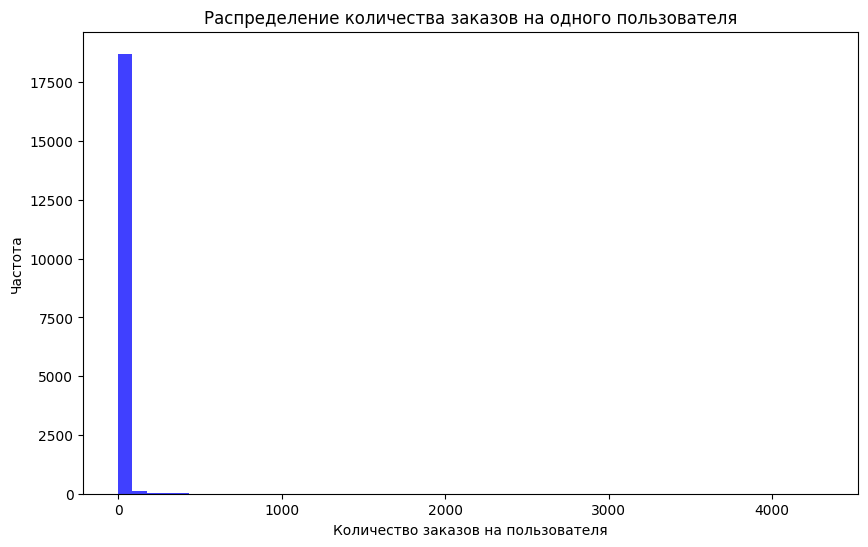

In [125]:
plt.figure(figsize=(10,6))

df_mob_desk['order_id'].plot(kind='hist',
                          bins=50,
                          color='blue',
                          alpha=0.75)

plt.title('Распределение количества заказов на одного пользователя')
plt.ylabel('Частота')
plt.xlabel('Количество заказов на пользователя')
plt.show()

75% значений лежат в области меньше, чем 4 заказов на пользователя. При этом максимальное значение аномально высокое -  4311 заказов на пользователя. Среднее значение значительно больше медианы. Стандартное отклонение очень большое. Гистограмма с "тяжелым правым хвостом". Ограничим датасет значением 99-го процентиля. 

In [126]:
df_mob_desk_lim = df_mob_desk[df_mob_desk['order_id'] <= df_mob_desk['order_id'].quantile(0.99)]

In [127]:
df_mob_desk_lim.describe()

,order_id
count,18771.000000
mean,5.012786
std,10.253403
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,112.000000


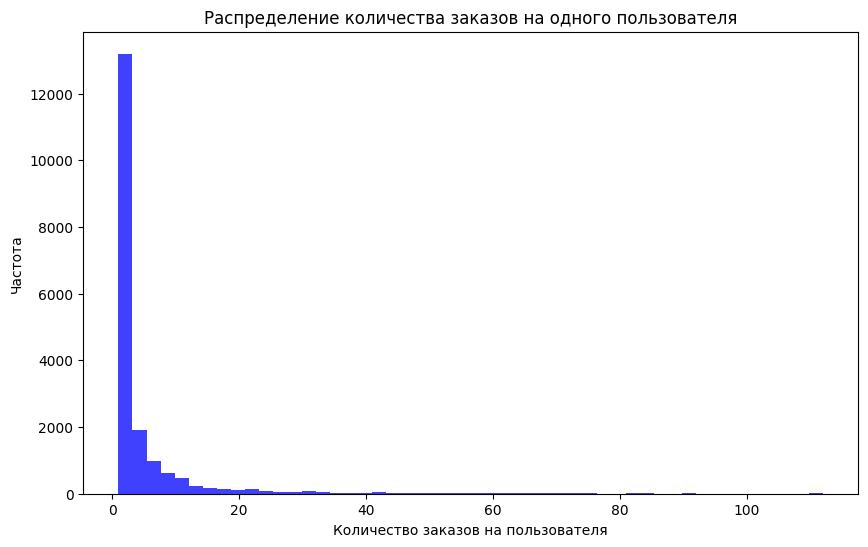

In [128]:
plt.figure(figsize=(10,6))

df_mob_desk_lim['order_id'].plot(kind='hist',
                          bins=50,
                          color='blue',
                          alpha=0.75)

plt.title('Распределение количества заказов на одного пользователя')
plt.ylabel('Частота')
plt.xlabel('Количество заказов на пользователя')
plt.show()

Для такой выборки значение среднего стало ближе к значению медианы. Однако стандартное отклонение достаточно велико и на гистограмме наблюдается выбросы с правой стороны.

Изучим распределение данных отдельно для пользователей мобильных и стационарных устройств.

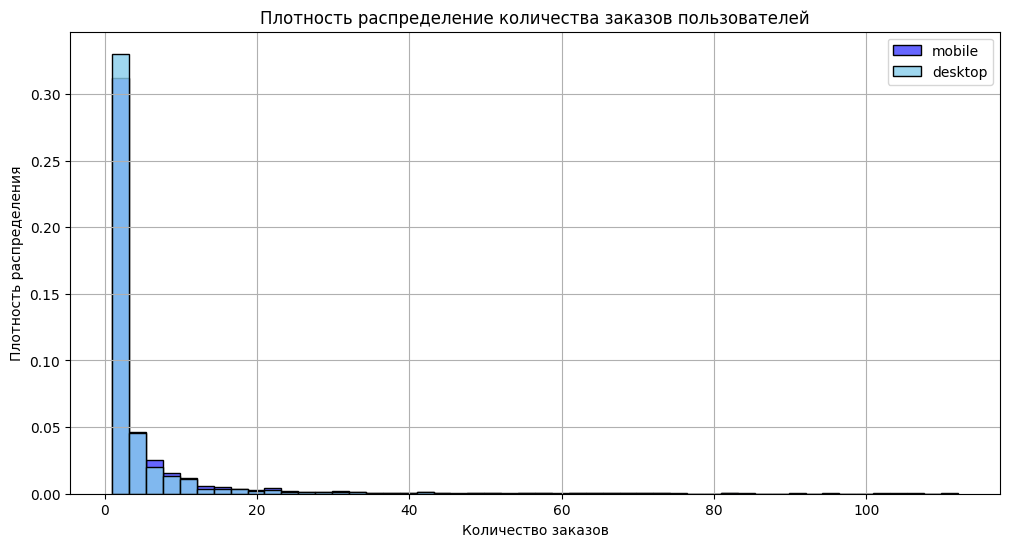

In [129]:
plt.figure(figsize=(12,6))

orders_mobile = df_mob_desk_lim[df_mob_desk_lim['device_type_canonical'] == 'mobile']['order_id']
orders_desktop = df_mob_desk_lim[df_mob_desk_lim['device_type_canonical'] == 'desktop']['order_id']

sns.histplot(data=orders_mobile,
             stat='density',
             common_norm=False,
             bins=50,
             color='blue',
             alpha=0.6,
             label='mobile')


sns.histplot(data=orders_desktop,
             stat='density',
             common_norm=False,
             bins=50,
             color='skyblue',
             alpha=0.8,
             label='desktop')

plt.title('Плотность распределение количества заказов пользователей')
plt.xlabel('Количество заказов')
plt.ylabel('Плотность распределения')
plt.grid()
plt.legend()

plt.show()

Распределения для двух групп похожи.

Исследуем соотношение размеров выборок для пользователей мобильными и стационарными устройствами.

In [130]:
mobile_df = df_mob_desk_lim[df_mob_desk_lim['device_type_canonical'] == 'mobile']
desktop_df = df_mob_desk_lim[df_mob_desk_lim['device_type_canonical'] == 'desktop']

In [131]:
mobile_df['user_id'].count()

13954

In [132]:
desktop_df['user_id'].count()

4817

In [133]:
round((mobile_df['user_id'].count() - desktop_df['user_id'].count()) * 100 / mobile_df['user_id'].count(), 2)

65.48

Количество пользователей мобильных устройств равно 13954. Количество пользователей стационарных устройств 4817. Процентная разница в количестве пользователей составляет 65,48%.

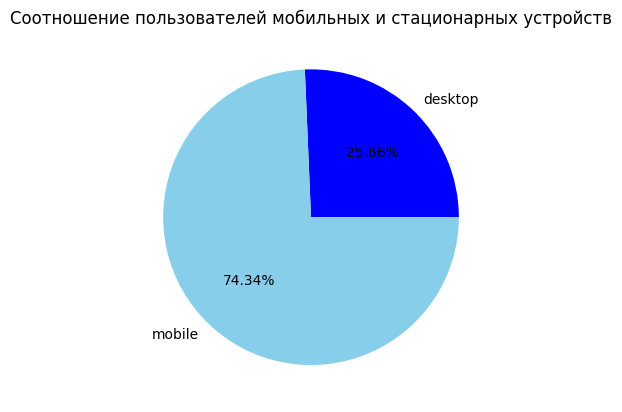

In [134]:
users_mob_desk = df_mob_desk_lim.groupby('device_type_canonical')['user_id'].count()

users_mob_desk.plot(
                    kind= 'pie',
                    title='Соотношение пользователей мобильных и стационарных устройств',
                    autopct="%.2f%%",
                    ylabel= '',
                    colors=['blue','skyblue']
)

plt.show()

Размеры групп для пользователей мобильных и стационарных устройств сильно отличаются.

Проверим группы на пересечение.

In [135]:
df_intersection = df_mob_desk_lim.groupby('user_id').agg({'device_type_canonical': 'nunique'}).query('device_type_canonical > 1').reset_index()
df_intersection.shape[0]

3084

3084 пользователя делают заказы и с помощью мобильного приложения, и с помощью стационарных устройств. Уберем из датасета строки, входящие в пересечение.

In [136]:
intersection = list(df_intersection['user_id'])
df_cl = df_mob_desk_lim[~df_mob_desk_lim['user_id'].isin(intersection)]

In [137]:
df_cl_mobile = df_cl[df_cl['device_type_canonical'] == 'mobile']
df_cl_desktop = df_cl[df_cl['device_type_canonical'] == 'desktop']
users_cl_mobile =  df_cl_mobile['user_id']
users_cl_desktop = df_cl_desktop['user_id']
list(set(users_cl_mobile) & set(users_cl_desktop))

[]

Пересечений больше нет.

Проверим соотношение пользователей в новых группах.

In [138]:
users_cl_mobile.count(), users_cl_desktop.count()

(10870, 1733)

Пользователей мобильных приложений - 10870, пользователей стационарных устройств - 1733.

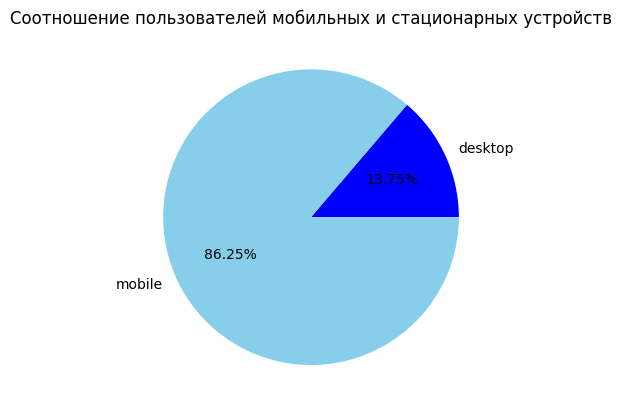

In [139]:
users_mob_desk_cl = df_cl.groupby('device_type_canonical')['user_id'].count()

users_mob_desk_cl.plot(
                    kind= 'pie',
                    title='Соотношение пользователей мобильных и стационарных устройств',
                    autopct="%.2f%%",
                    ylabel= '',
                    colors=['blue','skyblue']
)

plt.show()

Группы сильно отличаются по размеру.

Изучим распределение данных отдельно для пользователей мобильных и стационарных устройств для датасета без пересечений.

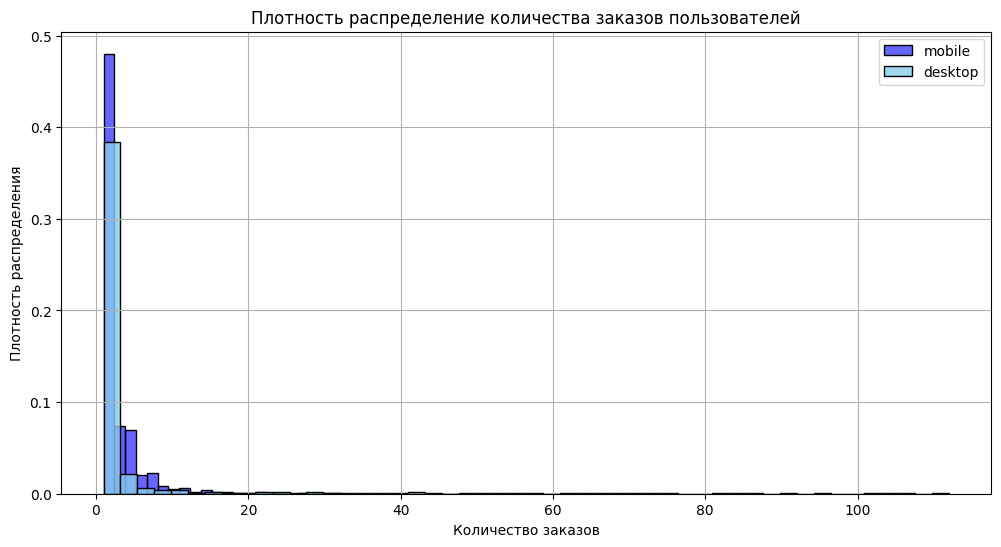

In [140]:
plt.figure(figsize=(12,6))

orders_mobile_cl = df_cl_mobile['order_id']
orders_desktop_cl = df_cl_desktop['order_id']

sns.histplot(data=orders_mobile_cl,
             stat='density',
             common_norm=False,
             bins=50,
             color='blue',
             alpha=0.6,
             label='mobile')


sns.histplot(data=orders_desktop_cl,
             stat='density',
             common_norm=False,
             bins=50,
             color='skyblue',
             alpha=0.8,
             label='desktop')

plt.title('Плотность распределение количества заказов пользователей')
plt.xlabel('Количество заказов')
plt.ylabel('Плотность распределения')
plt.grid()
plt.legend()

plt.show()

Распределения для двух групп похожи по форме.

Сравним статистики групп.

In [141]:
df_mob_desk_stat = pd.pivot_table(df_cl, index='device_type_canonical', values='order_id', aggfunc=['mean', 'std'])
df_mob_desk_stat

,mean,std
,order_id,order_id
device_type_canonical,,
desktop,4.627813,12.869682
mobile,2.856302,3.979078


Среднее количество заказов для пользователей мобильных устройств меньше, чем для пользователей стационарных устройств. Стандартные отклонения сильно отличаются.

Для анализа средних пользовательских метрик подходят t-тесты. Однако, в данных присутствует большое количество выбросов. Это может привести к неверным результатам при использовании t-тестов. Для данных такого типа лучше подходит тест Манна-Уитни. 

Будем проводить тест Манна-Уитни

Уровень значимости примем равным 0,05.

Сформулируем гипотезу для теста Манна-Уитни.

Нулевая гипотеза $H_0$: Распределение среднего количества заказов пользователей мобильного приложения не правее распределения среднего количества заказов пользователей стационарных устройств.  
Альтернативная гипотеза $H_1$: Распределение среднего количества заказов пользователей мобильного приложения правее распределения среднего количества заказов пользователей стационарных устройств. 

In [142]:
alpha=0.05

stat_mw, p_value_mw = mannwhitneyu(orders_mobile_cl, orders_desktop_cl, alternative='greater')

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=9.176816508155251e-17 < 0.05
Нулевая гипотеза не находит подтверждения!


При проверке гипотезы с помощью теста Манна-Уитни нулевая гипотеза не находит подтверждение.

### 4.2 Проверка гипотезы о среднем времени между заказами для пользователей разных типов устройств

Проверим гипотезу от том что активность пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств. Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза $H_0$: Среднее время между заказами пользователей мобильных приложений не ниже, чем время между заказами пользователей стационарных устройств.   
Альтернативная гипотеза $H_1$: Среднее время между заказами пользователей мобильных приложений ниже, чем время между заказами пользователей стационарных устройств.

Создадим датасет для проверки гипотезы.

In [143]:
df_mob_desk_time = df_autumn[['user_id', 'device_type_canonical', 'order_id', 'days_since_prev']]
df_mob_desk_time.head()

,user_id,device_type_canonical,order_id,days_since_prev
14,0beb8fc0c0a9ce1,mobile,4222372,0.0
15,0e6fa925c5f346f,desktop,5244622,0.0
16,0e6fa925c5f346f,desktop,5244651,0.0
19,1a7e020ee0b4418,desktop,4173884,NaN
21,26068df7451bdb0,mobile,6074399,0.0


Необходимо удалить строки с пропущенными значениями столбца `days_since_prev`.

In [144]:
df_order_time = df_mob_desk_time[df_mob_desk_time['days_since_prev'].isna() == False]

Изучим распределение значений стобца `days_since_prev`.

In [145]:
df_order_time['days_since_prev'].describe()

count    159398.000000
mean          3.617561
std          13.117877
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64

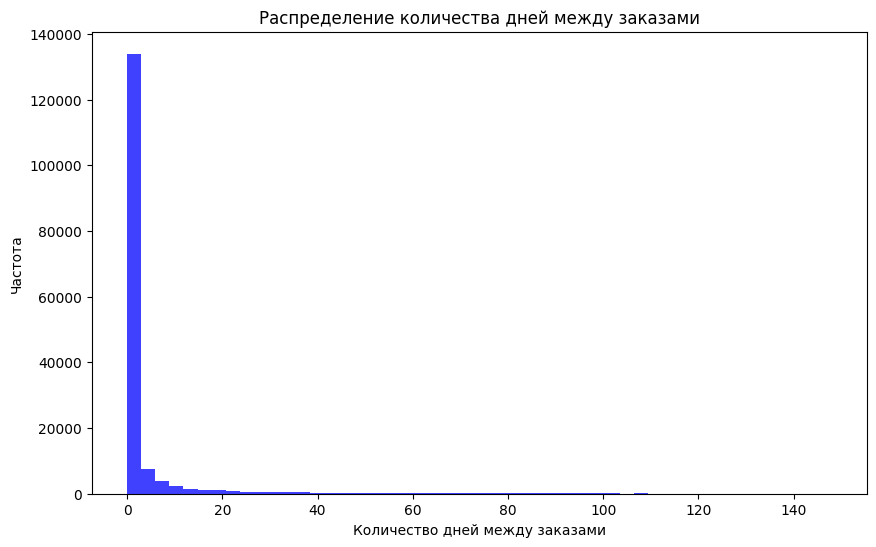

In [146]:
plt.figure(figsize=(10,6))

df_order_time['days_since_prev'].plot(kind='hist',
                                      bins=50,
                                      color='blue',
                                      alpha=0.75)

plt.title('Распределение количества дней между заказами')
plt.ylabel('Частота')
plt.xlabel('Количество дней между заказами')
plt.show()

По гистограмме распределения "с правым хвостом". Среднее значение сильно больше, чем медиана. Стандартное отклонение большое. Половина заказов создана в тот же день, что и предыдущий заказ. 75% значений меньше или равны 1. При этом максимальное значение равно 148. Все это свидетельствует о наличии выбросов в данных. Оставим в датасете значения меньше 99-го персентиля.

In [147]:
df_order_time_lim = df_order_time[df_order_time['days_since_prev'] <= df_order_time['days_since_prev'].quantile(0.99)]

In [148]:
df_order_time_lim.describe()

,order_id,days_since_prev
count,1.578410e+05,157841.000000
mean,4.315589e+06,2.662863
std,2.495837e+06,8.812405
min,3.000000e+01,0.000000
25%,2.166069e+06,0.000000
50%,4.309024e+06,0.000000
75%,6.472250e+06,1.000000
max,8.653050e+06,77.000000


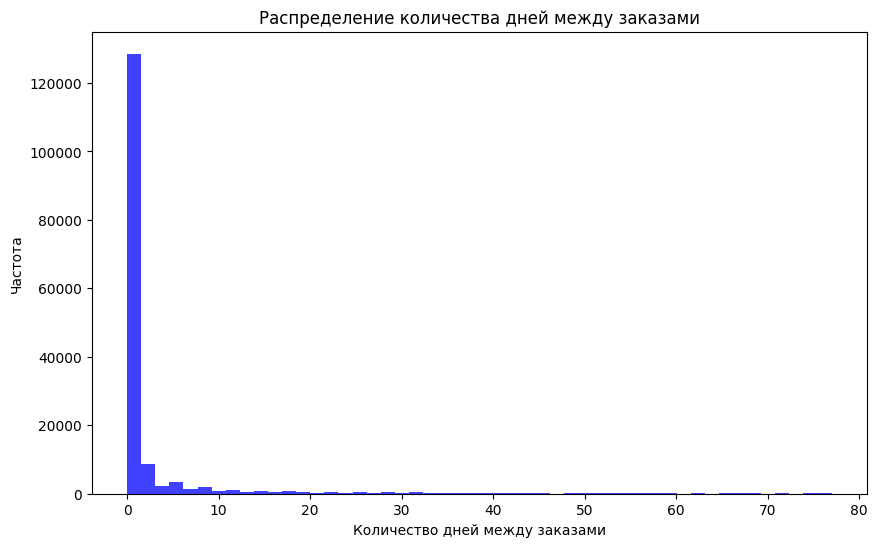

In [149]:
plt.figure(figsize=(10,6))

df_order_time_lim['days_since_prev'].plot(kind='hist',
                                      bins=50,
                                      color='blue',
                                      alpha=0.75)

plt.title('Распределение количества дней между заказами')
plt.ylabel('Частота')
plt.xlabel('Количество дней между заказами')
plt.show()

Количество выбросов уменьшилось.

Изучим распределение данных отдельно для пользователей мобильных и стационарных устройств.

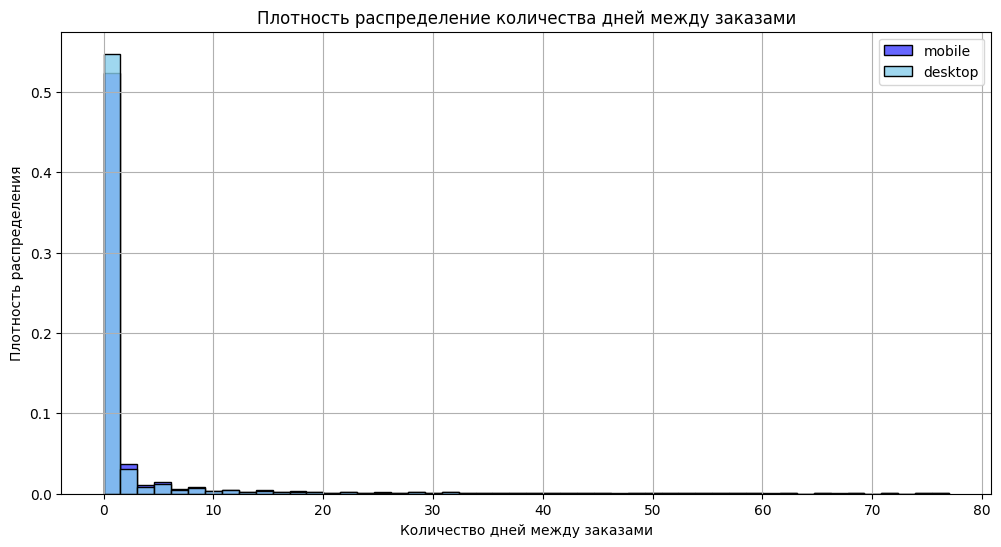

In [150]:
plt.figure(figsize=(12,6))

time_mobile = df_order_time_lim[df_order_time_lim['device_type_canonical'] == 'mobile']['days_since_prev']
time_desktop = df_order_time_lim[df_order_time_lim['device_type_canonical'] == 'desktop']['days_since_prev']

sns.histplot(data=time_mobile,
             stat='density',
             common_norm=False,
             bins=50,
             color='blue',
             alpha=0.6,
             label='mobile')


sns.histplot(data=time_desktop,
             stat='density',
             common_norm=False,
             bins=50,
             color='skyblue',
             alpha=0.8,
             label='desktop')

plt.title('Плотность распределение количества дней между заказами')
plt.xlabel('Количество дней между заказами')
plt.ylabel('Плотность распределения')
plt.grid()
plt.legend()

plt.show()

Распределения для двух групп похожи.

Исследуем соотношение размеров выборок для пользователей мобильными и стационарными устройствами.

In [151]:
mob_users = df_order_time_lim[df_order_time_lim.device_type_canonical == 'mobile'].user_id.nunique()
mob_users

9560

In [152]:
desk_users = df_order_time_lim[df_order_time_lim.device_type_canonical == 'desktop'].user_id.nunique()
desk_users

3861

In [153]:
round((mob_users - desk_users) * 100 / mob_users, 2)

59.61

Количество пользователей мобильных устройств равно 9560. Количество пользователей стационарных устройств 3861. Процентная разница в количестве пользователей составляет 59,61%.

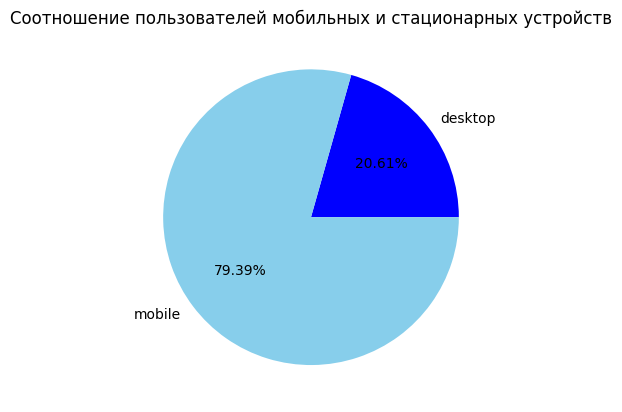

In [154]:
mob_desk_users = df_order_time_lim.groupby('device_type_canonical')['user_id'].count()

mob_desk_users.plot(
                    kind= 'pie',
                    title='Соотношение пользователей мобильных и стационарных устройств',
                    autopct="%.2f%%",
                    ylabel= '',
                    colors=['blue','skyblue']
)

plt.show()

Размеры групп для пользователей мобильных и стационарных устройств сильно отличаются.

Посмотрим пересекаются ли группы пользователей.

In [155]:
df_intersection_time = df_order_time_lim.groupby('user_id').agg({'device_type_canonical': 'nunique'}).query('device_type_canonical > 1').reset_index()
df_intersection_time.shape[0]

2945

2945 пользователей делают заказы и с помощью мобильных, и с помощью стационарных устройств. Удалим строки с пользователями, делающими заказы и с мобильных устройств, и со стационарных из датасета.

In [156]:
intersection = list(df_intersection_time['user_id'])
df_time_cl = df_order_time_lim[~df_order_time_lim['user_id'].isin(intersection)]

In [157]:
df_time_cl_mobile = df_time_cl[df_time_cl['device_type_canonical'] == 'mobile']
df_time_cl_desktop = df_time_cl[df_time_cl['device_type_canonical'] == 'desktop']
users_time_cl_mobile =  df_time_cl_mobile['user_id']
users_time_cl_desktop = df_time_cl_desktop['user_id']
list(set(users_time_cl_mobile) & set(users_time_cl_desktop))

[]

Пересечений нет.

Проверим соотношение пользователей в новых группах.

In [158]:
users_time_cl_mobile.nunique(), users_time_cl_desktop.nunique()

(6615, 916)

Пользователей мобильных приложений 6615, пользователей стационарных устройств 916.

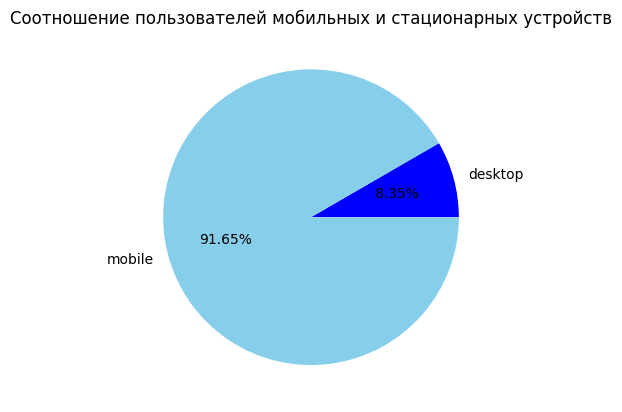

In [159]:
time_users = df_time_cl.groupby('device_type_canonical')['user_id'].count()

time_users.plot(
                    kind= 'pie',
                    title='Соотношение пользователей мобильных и стационарных устройств',
                    autopct="%.2f%%",
                    ylabel= '',
                    colors=['blue','skyblue']
)

plt.show()

Группы сильно отличаются по размеру.

Изучим распределение данных отдельно для пользователей мобильных и стационарных устройств для датасета без пересечений.

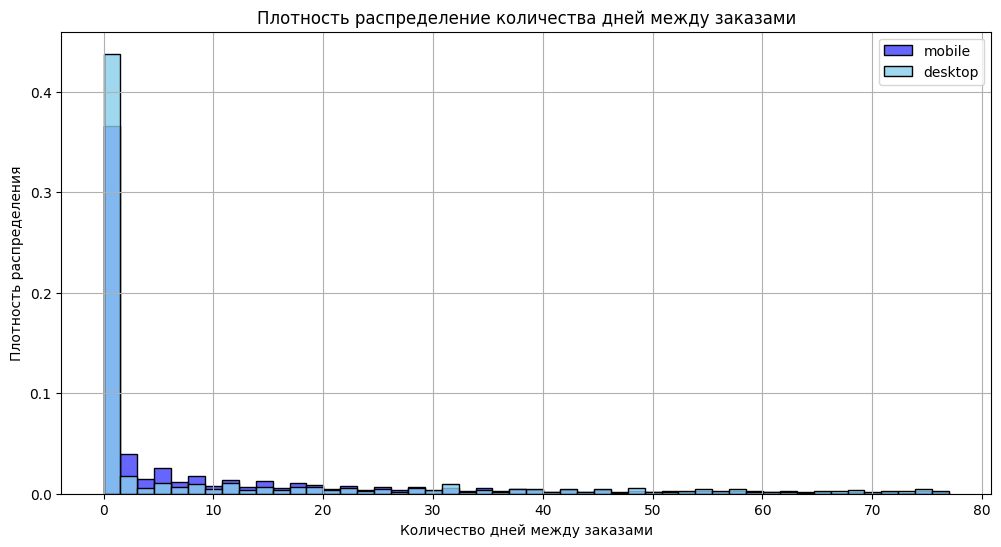

In [160]:
plt.figure(figsize=(12,6))

time_mobile_cl = df_time_cl_mobile['days_since_prev']
time_desktop_cl = df_time_cl_desktop['days_since_prev']

sns.histplot(data=time_mobile_cl,
             stat='density',
             common_norm=False,
             bins=50,
             color='blue',
             alpha=0.6,
             label='mobile')


sns.histplot(data=time_desktop_cl,
             stat='density',
             common_norm=False,
             bins=50,
             color='skyblue',
             alpha=0.8,
             label='desktop')

plt.title('Плотность распределение количества дней между заказами')
plt.xlabel('Количество дней между заказами')
plt.ylabel('Плотность распределения')
plt.grid()
plt.legend()

plt.show()

Распределения данных для двух групп похожи по форме.

Сравним статистики групп.

In [161]:
df_stat = pd.pivot_table(df_time_cl, index='device_type_canonical', values='days_since_prev', aggfunc=['mean', 'std'])
df_stat

,mean,std
,days_since_prev,days_since_prev
device_type_canonical,,
desktop,9.866883,18.972404
mobile,9.342951,16.574475


Среднее время между заказами меньше для пользователей мобильных приложений, чем для пользователей стационарных устройств. Стандартные отклонения не равны.

Для анализа средних пользовательских метрик подходят t-тесты. Однако, в данных присутствует большое количество выбросов. Это может привести к неверным результатам при использовании t-тестов. Для данных такого типа лучше подходит тест Манна-Уитни. 

Будем проводить тест Манна-Уитни

Уровень значимости примем равным 0,05.

Сформулируем гипотезу для теста Манна-Уитни.

Нулевая гипотеза $H_0$: Распределение среднего времени между заказами пользователей мобильного приложения не левее распределения среднего времени между заказами пользователей стационарных устройств.  
Альтернативная гипотеза $H_1$: Распределение среднего времени между заказами пользователей мобильного приложения левее распределения среднего времени между заказами пользователей стационарных устройств.  

In [162]:
alpha=0.05



stat_mw, p_value_mw = mannwhitneyu(time_mobile_cl, time_desktop_cl, alternative='less')

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=0.9999999999999999 > 0.05
Нулевая гипотеза находит подтверждение!


При проверке гипотезы с помощью теста Манна-Уитни нулевая гипотеза находит подтверждение.

### Промежуточный вывод
По результатам проверки гипотез:

Нулевая гипотеза о том, что среднее количество заказов на пользователя мобильного приложения не больше, чем среднее количество заказов пользователей стационарных устройств не находит подтверждения. Можно сделать вывод, что существует статистически значимое различие между средним количеством заказов пользователей мобильного приложения и средним количеством заказов пользователей стационарных устройств.

Нет оснований отвергнуть нулевую гипотезу о том, что среднее время между заказами для пользователей мобильного приложения не ниже, чем для пользователей стационарных устройств.

Однако, группы пользователей сильно отличаются по размеру и пересечение между группами большое.

## 5. Общий вывод и рекомендации

Проводился исследовательский анализ данных сервиса Яндекс Афиша за период с 01.06.2024 по 31.10.2024, а также проверка гипотез об активности пользователей мобильных и стационарных устройств.
Данные представлены датасетами:  
`final_tickets_orders_df.csv` - информация о всех заказах билетов, совершенных с помощью мобильных и стационарных устройств.  
`final_tickets_events_df.csv` - информация о событиях, включая город и регион события, а также информация о площадке проведения мероприятия.  
`final_tickets_tenge_df.csv` - информация о курсе тенге к российскому рублю за 2024 год.  

- Предобработка данных:  
Данные были проверены на пропуски, выбросы и дубликаты, изучены значения ключевых столбцов, преобразованы типы данных. Созданы необходимые столбцы.

Результаты исследовательского анализа.
- Количество заказов в целом больше осенью, чем летом. Популярность мероприятий "концерт", "выставки", "стендап", "другое" уменьшается осенью по сравнению с летом, а популярность спортивных и театральных мероприятий растет. Зависимости доли заказов в разрезе типа устройств от сезонности не наблюдается. Популярность мероприятий в категориях 0+, 12+ выше осенью, чем летом, в категории 6+ не меняется осенью по сравнению с летом, а в категориях 16+ и 18+ уменьшается осенью по сравнению с летом. Средняя стоимость одного билета меньше осенью, чем летом для всех типов мероприятий, кроме "выставки" и "стендап".
- Даты резкого роста количества заказов, DAU, среднего числа заказов на пользователя и суммарной выручки совпадают с датами резкого уменьшения стоимости одного билета. Общее количество заказов, среднее число заказов на пользователя и количество пользователей на выходных меньше, чем в будни.
- Лидерами по разнообразию мероприятий, количеству заказов и суммарной выручке являются Каменевский регион и Североярская область. 40% заказов и 48% суммарной выручки приходится на их долю. Лидерами по разнообразию мероприятий и количеству заказов являются партнеры "Лови билет!", "Билеты без проблем", "Билеты в руки". На из долю суммарно приходится 49,5% от всех заказов. Лидерами по выручке являются партнеры "Билеты без проблем", "Мой билет", "Облачко"  и "Лови билет!". На их долю приходится 53,8% выручки.


Результаты проверки гипотез:
- Для проверки гипотез использовался тест Манна-Уитни. Уровень значимости был принят равным 0,05.
- Нулевая гипотеза о том, что среднее количество заказов на пользователя мобильного приложения не больше, чем среднее количество заказов пользователей стационарных устройств не находит подтверждения. Можно сделать вывод, что существует статистически значимое различие между средним количеством заказов пользователей мобильного приложения и средним количеством заказов пользователей стационарных устройств.  
- Нет оснований отвергнуть нулевую гипотезу о том, что среднее время между заказами для пользователей мобильного приложения не ниже, чем для пользователей стационарных устройств.
- Группы пользователей сильно отличаются по размеру.

Рекомендации: 
- исследовать, чем отличаются регионы и партнеры с маленьким количеством заказов от регионов со средними показателями;
- уменьшение стоимости заказов приводит к росту выручки;
- стимулировать пользователей делать заказы с помощью мобильного приложения.
